In [1]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from community import community_louvain
from scipy.stats import gaussian_kde
import  matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import numpy as np
import pandas as pd
import hdbscan
import math
import warnings

warnings.filterwarnings("ignore")

In [2]:
#mig_data = pd.read_csv("final_mig.csv")
mig_data = pd.read_csv("nouna_data_for_model.csv")

Male:  Count: 61371
Female: Count: 73596
[61371, 73596]
Total_Sum
 134967
% Male --> 45.471115161483915
% Female --> 54.52888483851608


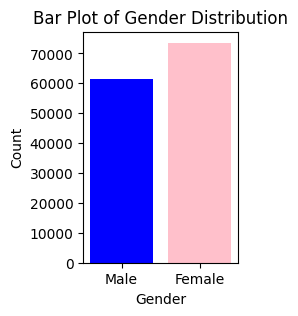

In [4]:
list_pop =[]
male =mig_data[mig_data['Sex'] == "Male"].shape[0]
female =mig_data[mig_data['Sex'] == "Female"].shape[0]

list_pop.append(male)
list_pop.append(female)

print(f"Male:  Count: {male}")
print(f"Female: Count: {female}")
print(list_pop)
total_popu = sum(list_pop)
print("Total_Sum\n", total_popu)


print("% Male -->", (male/total_popu) * 100)
print("% Female -->", (female/total_popu) * 100)

# Data
values = list_pop
labels = ['Male', 'Female']

# Plotting
plt.figure(figsize=(2,3))
plt.bar(labels, values, color=['blue', 'pink'])

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Bar Plot of Gender Distribution')

# Display the plot
plt.savefig('images/gender_distribution.png', dpi=500)
plt.show()

In [5]:
in_mig =[]
in_migs =mig_data[mig_data['EventCode'] == "IMG" ].shape[0]
out_migs =mig_data[mig_data['EventCode'] == "OMG"].shape[0]

print("in_migs -->", in_migs)
print("out_migs -->", out_migs)




total_events = sum([in_migs, out_migs])
print("Total_Events -->", total_events)
events = ['IMG', 'OMG']
in_outs = {event: mig_data[(mig_data['EventCode'] == event)].shape[0] for event in events}
event_percentages ={event: (mig_data[(mig_data['EventCode'] == event)].shape[0]/total_events)*100 for event in in_outs}
print(in_outs)
event_percentages




in_migs --> 64606
out_migs --> 70361
Total_Events --> 134967
{'IMG': 64606, 'OMG': 70361}


{'IMG': 47.8679973623182, 'OMG': 52.13200263768181}

In [6]:
#Male and Female pops & Percentages
male_in_migs =mig_data[(mig_data['EventCode'] == "IMG") & (mig_data['Sex'] == "Male")].shape[0]
male_out_migs =mig_data[(mig_data['EventCode'] == "OMG") & (mig_data['Sex'] == "Male")].shape[0]

print("Male_in_migs -->", male_in_migs)
print("Male_out_migs -->", male_out_migs)

male_in_migs =mig_data[(mig_data['EventCode'] == "IMG") & (mig_data['Sex'] == "Male")].shape[0]
male_out_migs =mig_data[(mig_data['EventCode'] == "OMG") & (mig_data['Sex'] == "Male")].shape[0]
#Male percentages
male_total = sum([male_in_migs, male_out_migs])
male_in_migs_perc = (male_in_migs/male_total) * 100
male_out_migs_perc = (male_out_migs/male_total) * 100

print("% Male_Out", male_in_migs_perc)
print("& Male_Out", male_out_migs_perc)
female_in_migs =mig_data[(mig_data['EventCode'] == "IMG") & (mig_data['Sex'] == "Female")].shape[0]
female_out_migs =mig_data[(mig_data['EventCode'] == "OMG") & (mig_data['Sex'] == "Female")].shape[0]

print("Female_in_migs -->", female_in_migs)
print("Female_out_migs -->", female_out_migs)

#Total
print("Total_in_out --> ", sum([male_in_migs, male_out_migs, female_in_migs, female_out_migs]))

#Female percentages
female_total = sum([female_in_migs, female_out_migs])
female_in_migs_perc = (female_in_migs/female_total) * 100
female_out_migs_perc = (female_out_migs/female_total) * 100

print("% Female_Out", female_in_migs_perc)
print("& Female_Out", female_out_migs_perc)

Male_in_migs --> 29481
Male_out_migs --> 31890
% Male_Out 48.03734662951557
& Male_Out 51.96265337048443
Female_in_migs --> 35125
Female_out_migs --> 38471
Total_in_out -->  134967
% Female_Out 47.72677862927333
& Female_Out 52.273221370726674


## Demographics 

In [8]:
list_ages =[]
less5 =mig_data[mig_data['AGE'] <= 5].shape[0]
less15 =mig_data[(mig_data['AGE'] > 5) & (mig_data['AGE'] <= 15)].shape[0]
less25 =mig_data[(mig_data['AGE'] > 15) & (mig_data['AGE'] <= 25)].shape[0]
less35 =mig_data[(mig_data['AGE'] > 25) & (mig_data['AGE'] <= 35)].shape[0]
less45 =mig_data[(mig_data['AGE'] > 35) & (mig_data['AGE'] <= 45)].shape[0]
less65 =mig_data[(mig_data['AGE'] > 45) & (mig_data['AGE'] <= 65)].shape[0]
great65 =mig_data[mig_data['AGE'] > 65].shape[0]
print("less5 -->", less5)
print("less15 -->", less15)
print("less25 -->",less25)
print("less35 -->", less35)
print("less45 -->", less45)
print("less55 -->", less65)
print("great65 -->", great65)
total_sum = sum([less5,less15,less35,less45,less65,great65])
print("Total Sum\n", total_sum)

print("less5 -->", (less5/total_sum) * 100)
print("less15 -->", (less15/total_sum) * 100)
print("less25 -->", (less25/total_sum) * 100)
print("less35 -->", (less35/total_sum) * 100)
print("less45 -->", (less45/total_sum) * 100)
print("less55 -->", (less65/total_sum) * 100)
print("great65 -->", (great65/total_sum) * 100)

#IN Migration Events
# in_counts = {f'less{i}_in': mig_data[(mig_data['AGE'] > low if i > 0 else mig_data['AGE'] >= low) &  #i is the upper age limit
#                         (mig_data['AGE'] <= high) & 
#                         (mig_data['EventCode'] == "IMG")].shape[0] 
#                         for i, (low, high) in enumerate([(0, 5), (5, 15), (15, 25), (25, 35), (35, 45), (45, 65), (65, float('inf'))])} #Float inf is positive infinity

# print("*********************************************************************")

# rounded_in_counts = {key: round(value, 2) for key, value in in_counts.items()}
# rounded_in_total = sum([v for v in rounded_in_counts.values()])
# print("Total Rounded_in_counts --> ", rounded_in_total)
# for k,v in rounded_in_counts.items():
#     print("less5_in --> {}, {}".format(v, (v/total_sum) * 100))

less5_in =mig_data[(mig_data['AGE'] <= 5) & (mig_data['EventCode'] == "IMG")].shape[0]
less15_in =mig_data[(mig_data['AGE'] > 5) & (mig_data['AGE'] <= 15) & (mig_data['EventCode'] == "IMG")].shape[0]
less25_in =mig_data[(mig_data['AGE'] > 15) & (mig_data['AGE'] <= 25) & (mig_data['EventCode'] == "IMG")].shape[0]
less35_in =mig_data[(mig_data['AGE'] > 25) & (mig_data['AGE'] <= 35) & (mig_data['EventCode'] == "IMG")].shape[0]
less45_in =mig_data[(mig_data['AGE'] > 35) & (mig_data['AGE'] <= 45) & (mig_data['EventCode'] == "IMG")].shape[0]
less65_in =mig_data[(mig_data['AGE'] > 45) & (mig_data['AGE'] <= 65) & (mig_data['EventCode'] == "IMG")].shape[0]
great65_in =mig_data[(mig_data['AGE'] > 65) & (mig_data['EventCode'] == "IMG")].shape[0]


print("\nless5_in --> {}, {} %".format(less5_in, (less5_in/total_sum) * 100))
print("less15_in --> {}, {} %".format(less15_in,(less15_in/total_sum) * 100))
print("less25_in --> {}, {} %".format(less25_in,(less25_in/total_sum) * 100))
print("less35_in --> {}, {} %".format(less35_in,(less35_in/total_sum) * 100))
print("less45_in --> {}, {} %".format(less45_in,(less45_in/total_sum) * 100))
print("less65_in --> {}, {} %".format(less65_in,(less65_in/total_sum) * 100))
print("less5_in --> {}, {} %".format(great65_in,(great65_in/total_sum) * 100))
total_in_sum = sum([less5_in, less15_in, less25_in, less35_in, less45_in, less65_in, great65_in])
print("Total rounded_in_counts Sum -->", total_in_sum)
print("*********************************************************************")
#Out Migration Events
out_counts = {f'less{i}_in': mig_data[(mig_data['AGE'] > low if i > 0 else mig_data['AGE'] >= low) &  #i is the upper age limit
                        (mig_data['AGE'] <= high) & 
                        (mig_data['EventCode'] == "OMG")].shape[0] 
                        for i, (low, high) in enumerate([(0, 5), (5, 15), (15, 25), (25, 35), (35, 45), (45, 65), (65, float('inf'))])} #Float inf is positive infinity
print("\n IN Events")

for k, v in out_counts.items():
    print(f"{k}: {v}")


rounded_out_counts = {key: round(value, 2) for key, value in out_counts.items()}
for k,v in rounded_out_counts.items():
    print("less5_in --> {}, {}".format(v, (v/total_sum) * 100))


# print("\n IN Events")

# print("\nless5_out --> {}, {}".format(less5_out, (less5_out/total_sum) * 100))
# print("less15_out --> {}, {}".format(less15_out,(less15_out/total_sum) * 100))
# print("less25_out --> {}, {}".format(less25_out,(less25_out/total_sum) * 100))
# print("less35_out --> {}, {}".format(less35_out,(less35_out/total_sum) * 100))
# print("less45_out --> {}, {}".format(less45_out,(less45_out/total_sum) * 100))
# print("less65_out --> {}, {}".format(less65_out,(less65_out/total_sum) * 100))
# print("less5_out --> {}, {}".format(great65_out,(great65_out/total_sum) * 100))
                                               

less5 --> 20526
less15 --> 36110
less25 --> 49032
less35 --> 16902
less45 --> 6367
less55 --> 4704
great65 --> 1326
Total Sum
 85935
less5 --> 23.885494850759294
less15 --> 42.02013149473439
less25 --> 57.05707802408797
less35 --> 19.668353988479666
less45 --> 7.409088264385873
less55 --> 5.4739046954093205
great65 --> 1.543026706231454

less5_in --> 11112, 12.930703438645489 %
less15_in --> 16833, 19.588060743585267 %
less25_in --> 22115, 25.734566823762144 %
less35_in --> 8360, 9.728283004596497 %
less45_in --> 3229, 3.757491127014604 %
less65_in --> 2323, 2.7032059114446967 %
less5_in --> 634, 0.737766916855763 %
Total rounded_in_counts Sum --> 64606
*********************************************************************

 IN Events
less0_in: 9414
less1_in: 19277
less2_in: 26917
less3_in: 8542
less4_in: 3138
less5_in: 2381
less6_in: 692
less5_in --> 9414, 10.954791412113806
less5_in --> 19277, 22.432070751149126
less5_in --> 26917, 31.322511200325824
less5_in --> 8542, 9.9400709838831

## Occupations

In [9]:

print(mig_data.occup1.unique())

hw =mig_data[(mig_data['occup1'] == 'House wife')].shape[0]
agric =mig_data[(mig_data['occup1'] == 'Agricultor')].shape[0]
artisan =mig_data[(mig_data['occup1'] == 'Artisan')].shape[0]
nsp =mig_data[(mig_data['occup1'] == 'NSP')].shape[0]
inactif =mig_data[(mig_data['occup1'] == 'Inactif')].shape[0]
salari =mig_data[(mig_data['occup1'] == 'SalariÃ©/entr')].shape[0]
autre =mig_data[(mig_data['occup1'] == 'Autre')].shape[0]
pasture =mig_data[(mig_data['occup1'] == 'Pasture')].shape[0]
religion =mig_data[(mig_data['occup1'] == 'Religion')].shape[0]
comer =mig_data[(mig_data['occup1'] == 'ComerÃ§ant')].shape[0]
occup = [mig_data[(mig_data['occup1'] == occ)].shape[0] for occ in ['House wife', 'Agricultor', 'Artisan', 'NSP', 'Inactif', 'SalariÃ©/entr', 'Autre', 'Pasture', 'Religion', 'ComerÃ§ant']]
total_occs = sum(occup)
print("Total sum of occs --> ", total_occs)
#Hold them in dictionary
occupations = ['House wife', 'Agricultor', 'Artisan', 'NSP', 'Inactif', 'SalariÃ©/entr', 'Autre', 'Pasture', 'Religion', 'ComerÃ§ant']
occup_counts = {occ: mig_data[(mig_data['occup1'] == occ)].shape[0] for occ in occupations}
print(occup_counts)
occup_percentages ={occ: (mig_data[(mig_data['occup1'] == occ)].shape[0]/total_occs)*100 for occ in occupations}
occup_counts
print("\nTotal occ %s--> ", sum([v for k,v in occup_percentages.items()]))
occup_percentages

['House wife' 'Agricultor' 'Artisan' 'NSP' 'Inactif' 'Employee' 'Autre'
 'Pasture' 'Religion' 'Trader']
Total sum of occs -->  131862
{'House wife': 6187, 'Agricultor': 22937, 'Artisan': 2568, 'NSP': 36751, 'Inactif': 59366, 'SalariÃ©/entr': 0, 'Autre': 1853, 'Pasture': 1990, 'Religion': 210, 'ComerÃ§ant': 0}

Total occ %s-->  100.0


{'House wife': 4.6920265125661675,
 'Agricultor': 17.394700520240857,
 'Artisan': 1.9474905583109614,
 'NSP': 27.870804325734476,
 'Inactif': 45.02131015758899,
 'SalariÃ©/entr': 0.0,
 'Autre': 1.4052570111176836,
 'Pasture': 1.5091535089715007,
 'Religion': 0.15925740546935432,
 'ComerÃ§ant': 0.0}

In [10]:
#Hold them in dictionary
occupations_in = ['House wife', 'Agricultor', 'Artisan', 'NSP', 'Inactif', 'SalariÃ©/entr', 'Autre', 'Pasture', 'Religion', 'ComerÃ§ant']
occup_counts_in = {occ: mig_data[(mig_data['occup1'] == occ) & (mig_data['EventCode'] == "IMG")].shape[0] for occ in occupations_in}
print(occup_counts_in)
#print("\nTotal occ %s--> ", sum([v for k,v in occup_percentages_in.items()]))
#occ_vals = list(occup_counts_in.values())
# for i in occ_vals:
#     print((i/total_occs)*100)
occ_percs = {k: (v/total_occs) * 100 for k, v in occup_counts_in.items()}
for k,v in occ_percs.items():
    print(f"{k}: {v:.2f}")

#Zip the results back to dictionary

percentage_dict = dict(zip(occ_percs.keys(), occ_percs.values()))
sum(occ_percs.values())

{'House wife': 1448, 'Agricultor': 10940, 'Artisan': 903, 'NSP': 17649, 'Inactif': 29691, 'SalariÃ©/entr': 0, 'Autre': 938, 'Pasture': 1154, 'Religion': 110, 'ComerÃ§ant': 0}
House wife: 1.10
Agricultor: 8.30
Artisan: 0.68
NSP: 13.38
Inactif: 22.52
SalariÃ©/entr: 0.00
Autre: 0.71
Pasture: 0.88
Religion: 0.08
ComerÃ§ant: 0.00


47.65057408502829

In [11]:
#Hold OUT in dictionary
occupations_out = ['House wife', 'Agricultor', 'Artisan', 'NSP', 'Inactif', 'SalariÃ©/entr', 'Autre', 'Pasture', 'Religion', 'ComerÃ§ant']
occup_counts_out = {occ: mig_data[(mig_data['occup1'] == occ) & (mig_data['EventCode'] == "OMG")].shape[0] for occ in occupations_out}
print(occup_counts_out)
#print("\nTotal occ %s--> ", sum([v for k,v in occup_percentages_in.items()]))
#occ_vals = list(occup_counts_in.values())
# for i in occ_vals:
#     print((i/total_occs)*100)
occ_percs_out = {k: (v/total_occs) * 100 for k, v in occup_counts_out.items()}
for k,v in occ_percs_out.items():
    print(f"{k}: {occup_counts_out[k]} --> {v:.2f}")

#Zip the results back to dictionary

percentage_dict_out = dict(zip(occ_percs_out.keys(), occ_percs_out.values()))
sum(occ_percs_out.values())
#occup_counts_out

{'House wife': 4739, 'Agricultor': 11997, 'Artisan': 1665, 'NSP': 19102, 'Inactif': 29675, 'SalariÃ©/entr': 0, 'Autre': 915, 'Pasture': 836, 'Religion': 100, 'ComerÃ§ant': 0}
House wife: 4739 --> 3.59
Agricultor: 11997 --> 9.10
Artisan: 1665 --> 1.26
NSP: 19102 --> 14.49
Inactif: 29675 --> 22.50
SalariÃ©/entr: 0 --> 0.00
Autre: 915 --> 0.69
Pasture: 836 --> 0.63
Religion: 100 --> 0.08
ComerÃ§ant: 0 --> 0.00


52.34942591497172

In [12]:
## MArriage Status

In [13]:

mig_data.union5.unique()

mar_in = ['never union', 'under-age15', 'union', 'separ/divorced','widow/er', 'DK']
mar_counts_in = {mar: mig_data[(mig_data['union5'] == mar) & (mig_data['EventCode'] == "IMG")].shape[0] for mar in mar_in}
print(mar_counts_in)
#print("\nTotal occ %s--> ", sum([v for k,v in occup_percentages_in.items()]))
#occ_vals = list(occup_counts_in.values())
# for i in occ_vals:
#     print((i/total_occs)*100)
mar_percs_in = {k: (v/total_occs) * 100 for k, v in mar_counts_in.items()}
for k,v in mar_percs_in.items():
    print(f"{k}: {mar_counts_in[k]} --> {v:.2f}")

#Zip the results back to dictionary

percentage_dict_mar_in = dict(zip(mar_percs_in.keys(), mar_percs_in.values()))
sum(percentage_dict_mar_in.values())




{'never union': 20301, 'under-age15': 20600, 'union': 21897, 'separ/divorced': 600, 'widow/er': 1135, 'DK': 73}
never union: 20301 --> 15.40
under-age15: 20600 --> 15.62
union: 21897 --> 16.61
separ/divorced: 600 --> 0.46
widow/er: 1135 --> 0.86
DK: 73 --> 0.06


48.99516160834812

### Marriage Status

In [14]:
#Hold OUT in dictionary
mar_out = ['never union', 'under-age15', 'union', 'separ/divorced','widow/er', 'DK']
mar_counts_out = {mar: mig_data[(mig_data['union5'] == mar) ].shape[0] for mar in mar_out}
print(mar_counts_out)
#print("\nTotal occ %s--> ", sum([v for k,v in occup_percentages_in.items()]))
#occ_vals = list(occup_counts_in.values())
# for i in occ_vals:
#     print((i/total_occs)*100)
mar_percs_out = {k: (v/total_occs) * 100 for k, v in mar_counts_out.items()}
for k,v in mar_percs_out.items():
    print(f"{k}: {mar_counts_out[k]} --> {v:.2f}")

#Zip the results back to dictionary

percentage_dict_mar_out = dict(zip(mar_percs_out.keys(), mar_percs_out.values()))
sum(percentage_dict_mar_out.values())
#occup_counts_out

{'never union': 44882, 'under-age15': 47339, 'union': 38797, 'separ/divorced': 1277, 'widow/er': 2155, 'DK': 517}
never union: 44882 --> 34.04
under-age15: 47339 --> 35.90
union: 38797 --> 29.42
separ/divorced: 1277 --> 0.97
widow/er: 2155 --> 1.63
DK: 517 --> 0.39


102.35473449515402

In [15]:
#Hold OUT in dictionary
mar_out = ['never union', 'under-age15', 'union', 'separ/divorced','widow/er', 'DK']
mar_counts_out = {mar: mig_data[(mig_data['union5'] == mar) & (mig_data['EventCode'] == "OMG")].shape[0] for mar in mar_out}
print(mar_counts_out)
#print("\nTotal occ %s--> ", sum([v for k,v in occup_percentages_in.items()]))
#occ_vals = list(occup_counts_in.values())
# for i in occ_vals:
#     print((i/total_occs)*100)
mar_percs_out = {k: (v/total_occs) * 100 for k, v in mar_counts_out.items()}
for k,v in mar_percs_out.items():
    print(f"{k}: {mar_counts_out[k]} --> {v:.2f}")

#Zip the results back to dictionary

percentage_dict_mar_out = dict(zip(mar_percs_out.keys(), mar_percs_out.values()))
sum(percentage_dict_mar_out.values())
#occup_counts_out

{'never union': 24581, 'under-age15': 26739, 'union': 16900, 'separ/divorced': 677, 'widow/er': 1020, 'DK': 444}
never union: 24581 --> 18.64
under-age15: 26739 --> 20.28
union: 16900 --> 12.82
separ/divorced: 677 --> 0.51
widow/er: 1020 --> 0.77
DK: 444 --> 0.34


53.35957288680589

## Admin Regions

In [16]:
mig_data.codvill_name.unique()

array(['Bourasso', 'Nouna', 'Dokui', 'Barani'], dtype=object)

In [17]:
#Hold OUT in dictionary
vill_in = ['Bourasso', 'Nouna', 'Dokui', 'Barani']
vill_counts_in = {vill: mig_data[(mig_data['codvill_name'] == vill) & (mig_data['EventCode'] == "IMG")].shape[0] for vill in sorted(vill_in)}
print(vill_counts_in)
#print("\nTotal occ %s--> ", sum([v for k,v in occup_percentages_in.items()]))
#occ_vals = list(occup_counts_in.values())
# for i in occ_vals:
#     print((i/total_occs)*100)
vill_percs_in = {k: (v/total_occs) * 100 for k, v in vill_counts_in.items()}
for k,v in vill_percs_in.items():
    print(f"{k}: {vill_counts_in[k]} --> {v:.2f}")

#Zip the results back to dictionary

percentage_dict_vill_in = dict(zip(vill_percs_in.keys(), vill_percs_in.values()))
sum(percentage_dict_vill_in.values())
#occup_counts_out

{'Barani': 845, 'Bourasso': 11402, 'Dokui': 6087, 'Nouna': 46272}
Barani: 845 --> 0.64
Bourasso: 11402 --> 8.65
Dokui: 6087 --> 4.62
Nouna: 46272 --> 35.09


48.99516160834812

In [18]:
#Hold OUT in dictionary
vill_out = ['Bourasso', 'Nouna', 'Dokui', 'Barani']
vill_counts_out = {vill: mig_data[(mig_data['codvill_name'] == vill) & (mig_data['EventCode'] == "OMG")].shape[0] for vill in sorted(vill_out)}
print(vill_counts_out)
#print("\nTotal occ %s--> ", sum([v for k,v in occup_percentages_in.items()]))
#occ_vals = list(occup_counts_in.values())
# for i in occ_vals:
#     print((i/total_occs)*100)
vill_percs_out = {k: (v/total_occs) * 100 for k, v in vill_counts_out.items()}
for k,v in vill_percs_out.items():
    print(f"{k}: {vill_counts_out[k]} --> {v:.2f}")

#Zip the results back to dictionary

percentage_dict_vill_out = dict(zip(vill_percs_out.keys(), vill_percs_out.values()))
sum(percentage_dict_vill_out.values())
#occup_counts_out

{'Barani': 735, 'Bourasso': 13251, 'Dokui': 6932, 'Nouna': 49443}
Barani: 735 --> 0.56
Bourasso: 13251 --> 10.05
Dokui: 6932 --> 5.26
Nouna: 49443 --> 37.50


53.3595728868059

In [16]:
#mig_data = df.drop(['IndividualId'], axis=1)
columns_to_drop = ['Event_date','Weekstart', 'index' ]
data = mig_data.drop(columns_to_drop, axis=1)
#data.head()

## Create Separate encoders for each column

In [18]:

df = mig_data.copy()
# Separate categorical and numerical features
categorical_cols = df.select_dtypes(include=['object'])
numerical_cols = df.select_dtypes(include=['int64', 'float64'])  # Improved selection using numpy.number
#boolean_cols = df.select_dtypes(include=['bool'])

# Encode the categorical columns
encoders = {}
for col in categorical_cols:
    encoders[col] = LabelEncoder()
    df[col + '_encoded'] = encoders[col].fit_transform(df[col])

In [19]:
df.iloc[:, -11:].head()

,Frequency,Afterseen,Event_date_encoded,EventCode_encoded,codvill_name_encoded,codmotife_encoded,Sex_encoded,union5_encoded,occup1_encoded,coddestin_encoded,Weekstart_encoded
0,0,0,690,1,1,6,0,1,4,5,219
1,0,0,1319,1,1,11,0,1,4,10,393
2,0,0,2382,1,1,11,0,1,4,0,562
3,0,0,286,0,1,9,1,1,0,7,72
4,0,0,2496,1,1,14,0,3,1,11,584


In [20]:
X = df[[col + '_encoded' for col in categorical_cols]]
Y = numerical_cols

merged_df = pd.concat([Y, X], axis = 1)
merged_df.head(2)

,IndividualId,AGE,codvillage2,numsecteur2,residence,Tmax,Tmin,Prec,Rsds,Tmean,...,Afterseen,Event_date_encoded,EventCode_encoded,codvill_name_encoded,codmotife_encoded,Sex_encoded,union5_encoded,occup1_encoded,coddestin_encoded,Weekstart_encoded
0,100003652,20,7,0,1,33.718452,23.412518,170.492501,269.374029,28.242426,...,0,690,1,1,6,0,1,4,5,219
1,100006655,17,7,0,1,33.819957,17.618199,0.000000,280.504157,26.016443,...,0,1319,1,1,11,0,1,4,10,393


# Apply HDBSCAN

In [21]:

np.random.seed(42)
clusterer = hdbscan.HDBSCAN(min_cluster_size=815, min_samples=415, gen_min_span_tree=True) #, random_state=1)
cluster_labels = clusterer.fit_predict(merged_df)

# Add cluster labels to DataFrame
df['cluster'] = cluster_labels
df['probability'] = clusterer.probabilities_
# Print the results
#df.head()

In [22]:
#clusterer.get_params()

In [24]:
# np.random.seed(42)
# clusterer = hdbscan.HDBSCAN(min_cluster_size=415, min_samples=215, gen_min_span_tree=True) #, random_state=1)
# clusters = clusterer.fit_predict(data)
# print("Succesfully done running...")

In [25]:
df = pd.DataFrame(data)
df['cluster'] = clusterer.labels_
df['probability'] = clusterer.probabilities_
#df.head(2)

In [26]:
# Drop columns containing '_decoded' in their name
#new_df = df.drop(columns=df.filter(like='_decoded').columns)
# new_df = df.drop(columns=df.filter(like='_encoded').columns)
# new_df.iloc[:20:, [-3,-2]].head(60)

In [27]:
#Create a copy of new_df
#df = new_df.copy()
df.head()
#df.columns
#df.dtypes

,IndividualId,AGE,EventCode,codvill_name,codvillage2,numsecteur2,codmotife,residence,Sex,union5,...,Event_date_Bool,BeforeEvent_date_Bool,AfterEvent_date_Bool,seen,days_since_last_id,months_since_last_id,Frequency,Afterseen,cluster,probability
0,100003652,20,OMG,Bourasso,7,0,marriage,1,Female,never union,...,True,0,0,True,0,0,0,0,3,0.645541
1,100006655,17,OMG,Bourasso,7,0,other_reasons,1,Female,never union,...,True,0,0,True,0,0,0,0,3,0.699163
2,100007656,18,OMG,Bourasso,7,0,other_reasons,1,Female,never union,...,True,0,0,True,0,0,0,0,3,0.674857
3,100008657,15,IMG,Bourasso,7,0,not_applicable,0,Male,never union,...,True,0,0,True,0,0,0,0,3,0.596578
4,100009658,15,OMG,Bourasso,7,0,study,1,Female,under-age15,...,True,0,0,True,0,0,0,0,3,0.676219


In [28]:
df.cluster.unique()

array([ 3, -1,  8,  7,  4,  2,  1,  0,  6,  5], dtype=int64)

In [29]:
color_palette = sns.color_palette('deep', 9)
def get_member_color(row):
    if row['cluster'] >= 0:
        c = color_palette[int(row['cluster'])]
    else:
        c = (0.5, 0.5, 0.5)
    
    member_color = sns.desaturate(c, row['probability'])
    return member_color

df['member_color'] = df.apply(get_member_color, axis=1)
#df.head()

In [30]:
# my_color = df.loc[0:1:,'member_color']
# my_color.to_csv("member_color.csv", index=False)
df.head()

,IndividualId,AGE,EventCode,codvill_name,codvillage2,numsecteur2,codmotife,residence,Sex,union5,...,BeforeEvent_date_Bool,AfterEvent_date_Bool,seen,days_since_last_id,months_since_last_id,Frequency,Afterseen,cluster,probability,member_color
0,100003652,20,OMG,Bourasso,7,0,marriage,1,Female,never union,...,0,0,True,0,0,0,0,3,0.645541,"(0.6866153809711683, 0.38789442295040055, 0.39..."
1,100006655,17,OMG,Bourasso,7,0,other_reasons,1,Female,never union,...,0,0,True,0,0,0,0,3,0.699163,"(0.6990220333483109, 0.3754877705732579, 0.386..."
2,100007656,18,OMG,Bourasso,7,0,other_reasons,1,Female,never union,...,0,0,True,0,0,0,0,3,0.674857,"(0.693398262899726, 0.38111154102184286, 0.391..."
3,100008657,15,IMG,Bourasso,7,0,not_applicable,0,Male,never union,...,0,0,True,0,0,0,0,3,0.596578,"(0.6752867815290025, 0.39922302239256635, 0.40..."
4,100009658,15,OMG,Bourasso,7,0,study,1,Female,under-age15,...,0,0,True,0,0,0,0,3,0.676219,"(0.6937133158556943, 0.3807964880658745, 0.391..."


In [32]:
# def punch_variables():
#     for i in df.columns:
#         column_index = df.columns.get_loc(i)
#         print("{} {} --> {}".format(column_index, i, df[i].dtype))
# punch_variables()

In [33]:
cluster=list(df["cluster"])


[ 3 -1  8  7  4  2  1  0  6  5]


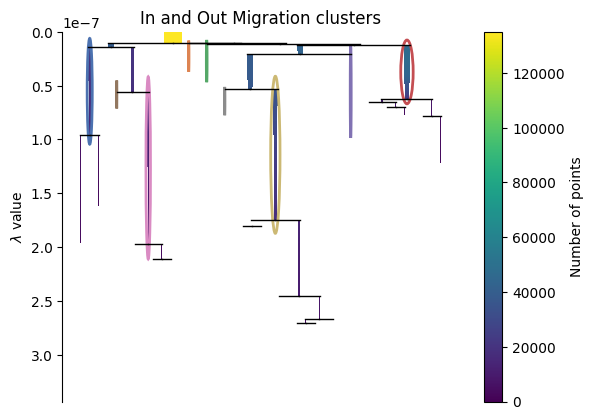

In [35]:
#Get a hierrarchy as a dendrogram, width and color of each branch
#representing the number of points in the cluster at that level
#Get which branches were selected
print(df.cluster.unique())
clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('deep', 10))
plt.title("In and Out Migration clusters")
plt.show()
#plt.savefig("images/in_out1.png")

In [36]:
#Minimum spanning Tree
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis', 
                                      #edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)

In [37]:
array = np.unique(clusterer.labels_)
pos_array = array[array >= 0]
desired_clusters = list(pos_array)
desired_clusters

[0, 1, 2, 3, 4, 5, 6, 7, 8]

Cluster: 0 Count: 19058
Cluster: 3 Count: 46555
Cluster: 6 Count: 17016
Cluster: 7 Count: 1649


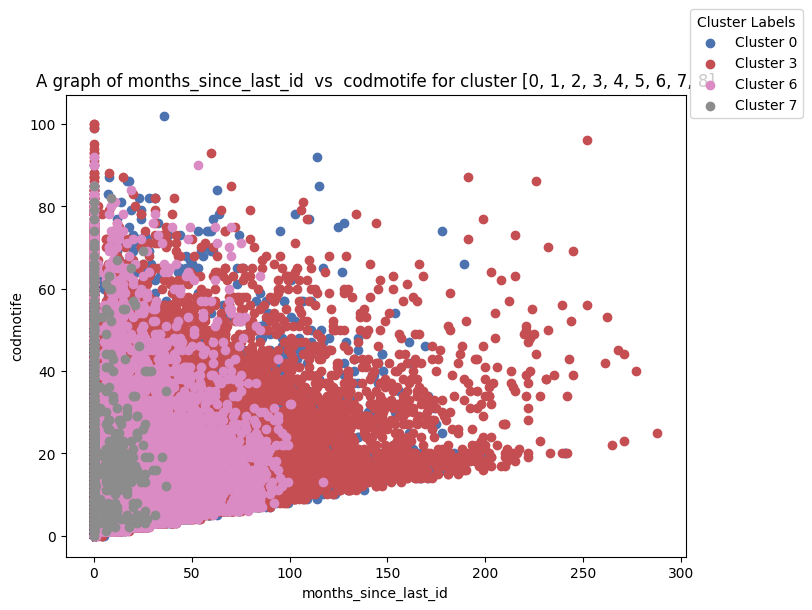

In [38]:
#Filter desired clusters
y_column = 6 #codmotiffe
x_column = 37
select_clus = [0,6,7,3]
filtered_df = df[df['cluster'].isin(select_clus)]

#Print the total count of each cluster in the filtered dataframe
for cluster in sorted(filtered_df['cluster'].unique()):
    count =filtered_df[filtered_df['cluster'] == cluster].shape[0]
    print(f"Cluster: {cluster} Count: {count}")
#Create the scatter plot with color based on member color
plt.figure(figsize=(8,6))
#palette = sns.color_palette('deep', 9)
#palette=sns.color_palette('husl', 9)
palette=sns.color_palette('deep', 10)
for cluster in sorted(filtered_df['cluster'].unique()):
    cluster_df =filtered_df[filtered_df['cluster'] == cluster]
    cluster_colorss = palette[cluster]
    #plt.scatter(cluster_df.['months_since_last_id'], cluster_df['AGE'], c=cluster_df['member_color'], label=f'Cluster {cluster}')
    #plt.scatter(cluster_df.iloc[:,37], cluster_df.iloc[:, 1], c=cluster_df.iloc[:, 42], label=f'Cluster {cluster}')
    plt.scatter(cluster_df.iloc[:,37], cluster_df.iloc[:, 1], c=cluster_colorss, label=f'Cluster {cluster}')

#Add labels and title
plt.title("A graph of {}  vs  {} for cluster {}".format(df.columns[x_column] , df.columns[y_column], desired_clusters))
plt.ylabel("{}".format(df.columns[y_column]))
plt.xlabel("{}".format(df.columns[x_column]))

#Order the legend based on cluster number
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
labels.sort(key=lambda x: int(x.split()[1]))
plt.legend([by_label[label] for label in labels], labels, loc='upper right', bbox_to_anchor=(1.2, 1.2), title='Cluster Labels')

plt.show()

## Climate Variables vs AGE, OCCUPATION

In [40]:
#filtered_df
desired_clusters = [0,3,6,7]

In [41]:
df.Frequency.max()

9

Cluster: 0 Count: 6824
Cluster: 3 Count: 16770
Cluster: 6 Count: 5533
Cluster: 7 Count: 265


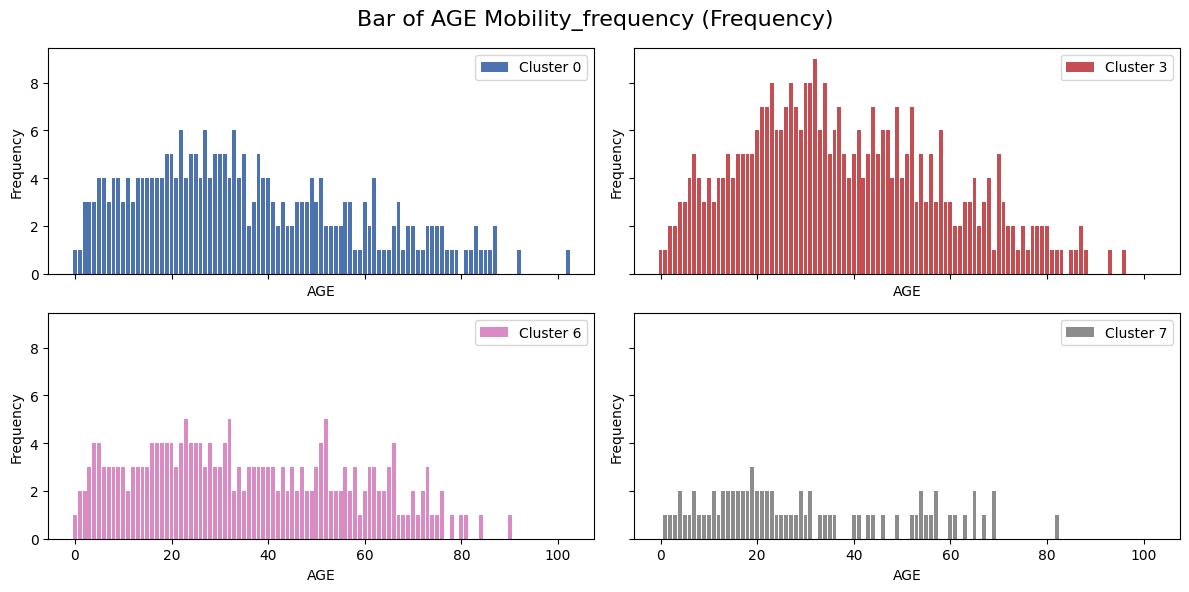

In [42]:
#Plot Each cluster with kernerl density distribution
#Filter desired clusters

x_column = 1
y_column = 38

filtered_df = df[df['cluster'].isin(desired_clusters)]
filtered_df = filtered_df[filtered_df['Frequency'] !=0]
filtered_df.groupby('IndividualId')['Frequency'].max().reset_index()

#Print the total count of each cluster in the filtered dataframe
for cluster in sorted(filtered_df['cluster'].unique()):
    count =filtered_df[filtered_df['cluster'] == cluster].shape[0]
    print(f"Cluster: {cluster} Count: {count}")

#Plot for each cluster

#Create the scatter plot with color based on member color
n_clusters = len(desired_clusters)
#n_rows = int(n_clusters / 4) + (n_clusters % 4)
n_rows = 2

fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(12,6), sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.8)
#palette=sns.color_palette('deep', 10)

#AGe
threshold_age = 40

#Plot each
cluster_index = 0
for i in range(n_rows):
    for j in range(2):
        if cluster_index >= n_clusters:
            break #No more clusters
        cluster = desired_clusters[cluster_index]
        #for cluster in sorted(filtered_df['cluster'].unique()):
        cluster_df =filtered_df[filtered_df['cluster'] == cluster]
        cluster_color = palette[cluster]
        #KDE to estimate smooth distribution
        # x = cluster_df.iloc[:, x_column]
        # kde_xs = np.linspace(x.min(), x.max(), 200) #Adjust the number of points for smooth curves
        # kde_ys = gaussian_kde(x)(kde_xs)
        #axes[i, j].scatter(cluster_df.iloc[:,x_column], cluster_df.iloc[:, y_column], c=cluster_df.iloc[:, 42], label=f'Cluster {cluster}')
        #axes[i, j].bar(cluster_df.iloc[:,x_column], cluster_df.iloc[:, y_column], color=cluster_df.iloc[:, 42], label=f'Cluster {cluster}') #,c=cluster_df.iloc[:, 42],)
        axes[i, j].bar(cluster_df.iloc[:,x_column], cluster_df.iloc[:, y_column], color=cluster_color, label=f'Cluster {cluster}') #,c=cluster_df.iloc[:, 42],)
        #Add labels and title
        #axes[i, j].set_title("A graph of cluster {}".format(cluster_index))
        axes[i, j].set_ylabel("{}".format(df.columns[y_column]))
        axes[i, j].set_xlabel("{}".format(df.columns[x_column]))

        #Draw the threshold line using axhline()
        #axes[i, j].axhline(y=threshold_age, color='red', linestyle='--', linewidth=1) #, label=f'Threshold" Age = {threshold_age}')
        #Order the legend based on cluster number
        #handles, labels = plt.gca().get_legend_handles_labels()
        handles, labels = axes[i, j].get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        #labels.sort(key=lambda x: int(x.split()[1]))
        axes[i, j].legend([by_label[label] for label in labels], labels, loc='upper right') #, title='Cluster Labels')
        cluster_index += 1
#Add general title
fig.suptitle("Bar of {} Mobility_frequency ({})".format(filtered_df.columns[x_column], filtered_df.columns[y_column]), fontsize=16)
plt.tight_layout()
#file_name = "freq_occupation.png"
#plt.savefig(file_name, format="png", dpi=500)
plt.show()


## All Migration reasons all clusters

Cluster: 0 Count: 6824
Cluster: 1 Count: 478
Cluster: 2 Count: 946
Cluster: 3 Count: 16770
Cluster: 4 Count: 940
Cluster: 5 Count: 641
Cluster: 6 Count: 5533
Cluster: 7 Count: 265


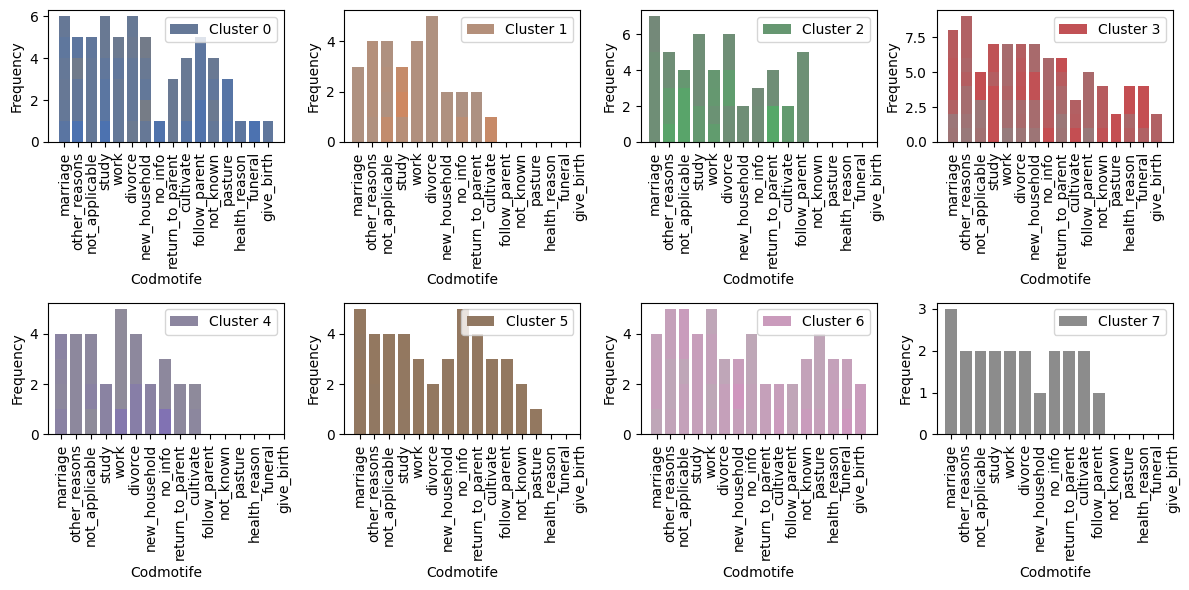

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

reasons_desired_clusters = [0, 1, 2, 3, 4, 5, 6, 7]
x_column = 6
y_column = 38
my_labels = list(df.codmotife.unique())

# Filter the dataframe
filtered_df = df[df['cluster'].isin(reasons_desired_clusters)]
filtered_df = filtered_df[filtered_df['Frequency'] != 0]

# Print the total count of each cluster in the filtered dataframe
for cluster in sorted(filtered_df['cluster'].unique()):
    count = filtered_df[filtered_df['cluster'] == cluster].shape[0]
    print(f"Cluster: {cluster} Count: {count}")

# Plot for each cluster
n_clusters = len(reasons_desired_clusters)
n_cols = int(len(reasons_desired_clusters) / 2)
n_rows = (n_clusters + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 6))
plt.subplots_adjust(hspace=0.8)
palette = sns.color_palette('deep', 10)

# Create a dictionary to store cluster colors
cluster_colors = {}
cluster_index = 0

for i in range(n_rows):
    for j in range(n_cols):
        if cluster_index >= n_clusters:
            break
        
        cluster = reasons_desired_clusters[cluster_index]
        cluster_color = cluster_colors.get(cluster)
        if cluster_color is None:
            cluster_color = palette[cluster]
            cluster_colors[cluster] = cluster_color
        
        cluster_df = filtered_df[filtered_df['cluster'] == cluster]
        member_colors = cluster_df['member_color'].to_numpy()
        
        bars = axes[i, j].bar(cluster_df.iloc[:, x_column], cluster_df.iloc[:, y_column], color=cluster_df.iloc[:, 42], label=f'Cluster {cluster}')
        
        # Add labels and title
        axes[i, j].set_ylabel("{}".format(df.columns[y_column]))
        axes[i, j].set_xlabel("{}".format(df.columns[x_column]).capitalize())
        axes[i, j].set_xticks(range(len(my_labels)))
        axes[i, j].set_xticklabels(my_labels, rotation=90, ha='center')
        
        # Calculate the total count for each variable within the cluster
        for bar in bars:
            height = bar.get_height()
            bar_label = bar.get_x() + bar.get_width() / 2.0  # Get the center position of the bar on the x-axis
            # Check if there are rows matching the condition
            if not cluster_df[cluster_df.iloc[:, x_column] == bar.get_x()].empty:
                bar_value = cluster_df[cluster_df.iloc[:, x_column] == bar.get_x()].iloc[0, y_column]
                axes[i, j].text(bar_label, height, f'{bar_value}', ha='center', va='bottom')
        
        # Add legend
        handles, labels = axes[i, j].get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        axes[i, j].legend([by_label[label] for label in labels], labels, loc='upper right')
        
        cluster_index += 1

plt.tight_layout()
file_name = "all_migration_reasons.png"
#plt.savefig(file_name, format="png", dpi=500)
plt.show()


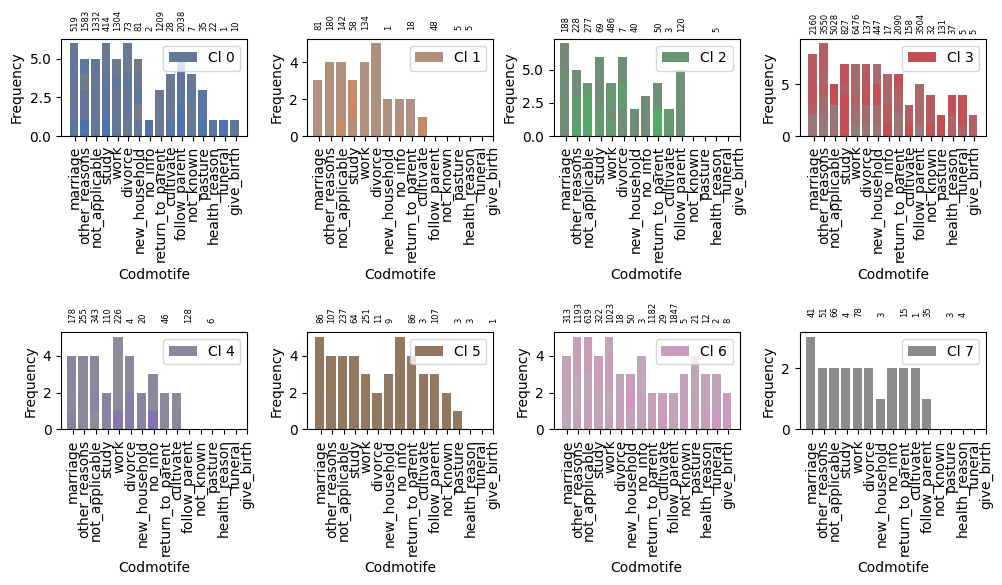

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with your actual data)
reasons_desired_clusters = [0, 1,2, 3, 4,5,6, 7]
x_column = 6
y_column = 38
my_labels = list(df.codmotife.unique())  # Replace with your actual labels

# Filter the dataframe
filtered_df = df[df['cluster'].isin(reasons_desired_clusters)]
filtered_df = filtered_df[filtered_df['Frequency'] != 0]

# Plot setup
n_clusters = len(reasons_desired_clusters)
n_cols = int(len(reasons_desired_clusters) / 2)
n_rows = (n_clusters + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 6))  # Reduce plot size
plt.subplots_adjust(hspace=0.95)  # Increase vertical spacing

palette = sns.color_palette('deep', 10)

# Create a dictionary to store cluster-variable totals
cluster_totals = {}

# Create a dictionary to store cluster colors
cluster_colors = {}
cluster_index = 0

for i in range(n_rows):
    for j in range(n_cols):
        if cluster_index >= n_clusters:
            break

        cluster = reasons_desired_clusters[cluster_index]
        cluster_color = cluster_colors.get(cluster)
        if cluster_color is None:
            cluster_color = palette[cluster]
            cluster_colors[cluster] = cluster_color

        # # Check if cluster exists in filtered data before proceeding
        # if cluster not in filtered_df['cluster'].unique():
        #     cluster_index += 1
        #     continue  # Skip to the next iteration if no data for this cluster

        cluster_df = filtered_df[filtered_df['cluster'] == cluster]

        # Plot bars
        bars = axes[i, j].bar(cluster_df.iloc[:, x_column], cluster_df.iloc[:, y_column], color=cluster_df.iloc[:, 42], label=f'Cl {cluster}')

        # Add labels and title
        axes[i, j].set_ylabel("{}".format(df.columns[y_column]))
        axes[i, j].set_xlabel("{}".format(df.columns[x_column]).capitalize())

        # Calculate x-axis positions based on cluster index
        x_positions = [i + 0.1 for i in range(len(my_labels))]  # Adjust offset as needed

        axes[i, j].set_xticks(x_positions)
        axes[i, j].set_xticklabels(my_labels, rotation=90, ha='center')  # Rotate x-axis labels

        # Calculate and store totals in dictionary
        cluster_totals[(cluster, x_column)] = {}  # Key: (cluster, variable column)
        for label in my_labels:
            label_df = cluster_df[cluster_df.iloc[:, x_column] == label]
            total = label_df.iloc[:, y_column].sum()
            # Store total only if it's not zero
            if total > 0:
                cluster_totals[(cluster, x_column)][label] = total

        # Add legend
        handles, labels = axes[i, j].get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        axes[i, j].legend([by_label[label] for label in labels], labels, loc='upper right')

        cluster_index += 1

# Manually plot total labels for each subplot
for (cluster, _), label_totals in cluster_totals.items():
    cluster_index = reasons_desired_clusters.index(cluster)
    if cluster_index < n_clusters:  # Ensure cluster index is within bounds
        for label, total in label_totals.items():
            label_index = my_labels.index(label)
            x_pos = x_positions[label_index]
            y_pos = axes[cluster_index// n_cols, cluster_index % n_cols].get_ylim()[1]  # Get max y-limit of the subplot
            y_pos += 0.5  # Adjust y-offset for label placement

            axes[cluster_index // n_cols, cluster_index % n_cols].text(x_pos, y_pos, str(total), rotation=90, ha='center', va='bottom', fontsize=6, color='black')
            #axes[cluster_index, 0].text(x_pos, y_pos, str(total), rotation=90, ha='center', va='bottom', fontsize=6, color='black')

plt.tight_layout()
file_name = "all_migration_reasons_numbers.png"
plt.savefig(file_name, format="png", dpi=500)
plt.show()



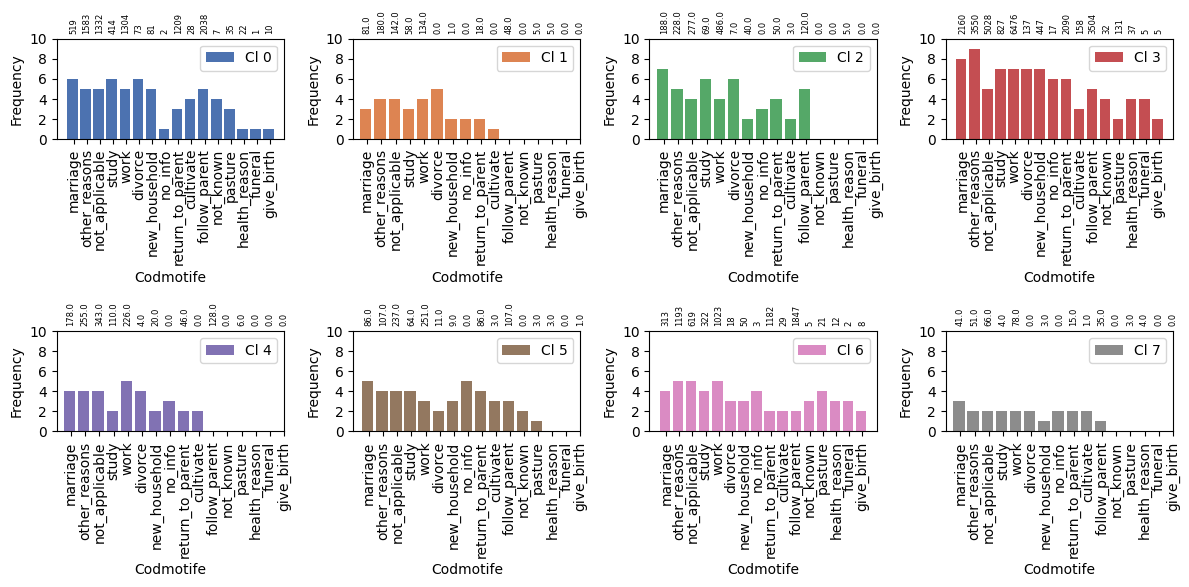

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with your actual data)
reasons_desired_clusters = [0, 1, 2, 3, 4, 5, 6, 7]
x_column = 6
y_column = 38
my_labels = list(df.codmotife.unique())  # Replace with your actual labels

# Filter the dataframe
filtered_df = df[df['cluster'].isin(reasons_desired_clusters)]
filtered_df = filtered_df[filtered_df['Frequency'] != 0]

# Plot setup
n_clusters = len(reasons_desired_clusters)
n_cols = int(len(reasons_desired_clusters) / 2)
n_rows = (n_clusters + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 6))  # Reduce plot size
plt.subplots_adjust(hspace=0.95)  # Increase vertical spacing

palette = sns.color_palette('deep', 10)

# Create a dictionary to store cluster-variable totals
cluster_totals = {}

# Create a dictionary to store cluster colors
cluster_colors = {}
cluster_index = 0

for i in range(n_rows):
    for j in range(n_cols):
        if cluster_index >= n_clusters:
            break

        cluster = reasons_desired_clusters[cluster_index]
        cluster_color = cluster_colors.get(cluster)
        if cluster_color is None:
            cluster_color = palette[cluster]
            cluster_colors[cluster] = cluster_color

        # Get data for the current cluster
        cluster_df = filtered_df[filtered_df['cluster'] == cluster]

        # Ensure all labels are represented in the plot, even with count 0
        for label in my_labels:
            if label not in cluster_df.iloc[:, x_column].astype(str).values:
                # Create a new row for the missing label with count 0 (ensure proper types)
                cluster_df = pd.concat(
                    [cluster_df, pd.DataFrame([{x_column: str(label), y_column: 0}])],
                    ignore_index=True
                )

        # Convert x_column values to strings for the bar plot
        cluster_df.iloc[:, x_column] = cluster_df.iloc[:, x_column].astype(str)

        # Plot bars
        bars = axes[i, j].bar(cluster_df.iloc[:, x_column], cluster_df.iloc[:, y_column], color=cluster_color, label=f'Cl {cluster}')

        # Add labels and title
        axes[i, j].set_ylabel("{}".format(df.columns[y_column]))
        axes[i, j].set_xlabel("{}".format(df.columns[x_column]).capitalize())

        # Set y-axis limits and ticks
        axes[i, j].set_ylim(0, 7)  # Set y-axis limit from 0 to 6
        axes[i, j].set_yticks(range(0, 12, 2))  # Set ticks at intervals of 1
        

        # Calculate x-axis positions based on cluster index
        x_positions = [i + 0.1 for i in range(len(my_labels))]  # Adjust offset as needed

        axes[i, j].set_xticks(x_positions)
        axes[i, j].set_xticklabels(my_labels, rotation=90, ha='center')  # Rotate x-axis labels

        # Calculate and store totals in dictionary, including zeros
        cluster_totals[(cluster, x_column)] = {}  # Key: (cluster, variable column)
        for label in my_labels:
            label_df = cluster_df[cluster_df.iloc[:, x_column] == label]
            total = label_df.iloc[:, y_column].sum()
            # Store the total, even if it's zero
            cluster_totals[(cluster, x_column)][label] = total

        # Add legend
        handles, labels = axes[i, j].get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        axes[i, j].legend([by_label[label] for label in labels], labels, loc='upper right')

        cluster_index += 1


# Manually plot total labels for each subplot, including zeros
for (cluster, _), label_totals in cluster_totals.items():
    cluster_index = reasons_desired_clusters.index(cluster)
    if cluster_index < n_clusters:  # Ensure cluster index is within bounds
        for label, total in label_totals.items():
            label_index = my_labels.index(label)
            x_pos = x_positions[label_index]
            y_pos = axes[cluster_index // n_cols, cluster_index % n_cols].get_ylim()[1]  # Get max y-limit of the subplot
            y_pos += 0.5  # Adjust y-offset for label placement

            # Display the total at the top of each bar, including zero
            axes[cluster_index // n_cols, cluster_index % n_cols].text(x_pos, y_pos, str(total), rotation=90, ha='center', va='bottom', fontsize=6, color='black')

plt.tight_layout()
file_name = "all_numbers_migration_reasons_numbers.png"
plt.savefig(file_name, format="png", dpi=500)
plt.show()


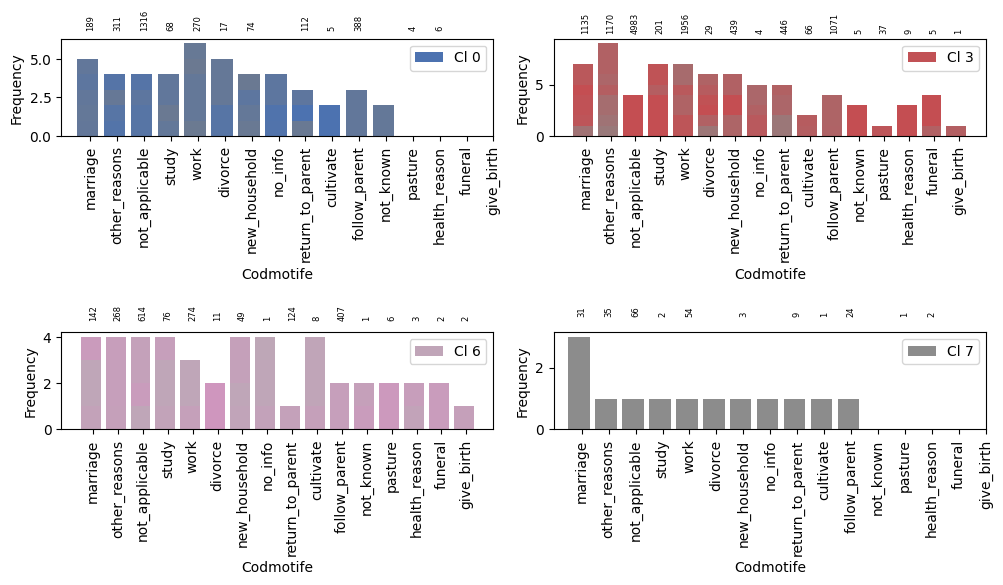

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with your actual data)
reasons_desired_clusters = [0, 3, 6, 7]
x_column = 6
y_column = 38
my_labels = list(df.codmotife.unique())  # Replace with your actual labels

# Filter the dataframe
filtered_df = df[df['cluster'].isin(reasons_desired_clusters)]
filtered_df = filtered_df[(filtered_df['EventCode'] == "IMG") & (filtered_df['Frequency'] != 0)]

# Plot setup
n_clusters = len(reasons_desired_clusters)
n_cols = int(len(reasons_desired_clusters) / 2)
n_rows = (n_clusters + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 6))  # Reduce plot size
plt.subplots_adjust(hspace=0.95)  # Increase vertical spacing

palette = sns.color_palette('deep', 10)

# Create a dictionary to store cluster-variable totals
cluster_totals = {}

# Create a dictionary to store cluster colors
cluster_colors = {}
cluster_index = 0

for i in range(n_rows):
    for j in range(n_cols):
        if cluster_index >= n_clusters:
            break

        cluster = reasons_desired_clusters[cluster_index]
        cluster_color = cluster_colors.get(cluster)
        if cluster_color is None:
            cluster_color = palette[cluster]
            cluster_colors[cluster] = cluster_color

        # # Check if cluster exists in filtered data before proceeding
        # if cluster not in filtered_df['cluster'].unique():
        #     cluster_index += 1
        #     continue  # Skip to the next iteration if no data for this cluster

        cluster_df = filtered_df[filtered_df['cluster'] == cluster]

        # Plot bars
        bars = axes[i, j].bar(cluster_df.iloc[:, x_column], cluster_df.iloc[:, y_column], color=cluster_df.iloc[:, 42], label=f'Cl {cluster}')

        # Add labels and title
        axes[i, j].set_ylabel("{}".format(df.columns[y_column]))
        axes[i, j].set_xlabel("{}".format(df.columns[x_column]).capitalize())

        # Set y-axis limits and ticks
        axes[i, j].set_ylim(0, 7)  # Set y-axis limit from 0 to 6
        axes[i, j].set_yticks(range(0, 12, 2))  # Set ticks at intervals of 1

        # Calculate x-axis positions based on cluster index
        x_positions = [i + 0.1 for i in range(len(my_labels))]  # Adjust offset as needed

        axes[i, j].set_xticks(x_positions)
        axes[i, j].set_xticklabels(my_labels, rotation=90, ha='center')  # Rotate x-axis labels

        # Calculate and store totals in dictionary
        cluster_totals[(cluster, x_column)] = {}  # Key: (cluster, variable column)
        for label in my_labels:
            label_df = cluster_df[cluster_df.iloc[:, x_column] == label]
            total = label_df.iloc[:, y_column].sum()
            # Store total only if it's not zero
            if total > 0:
                cluster_totals[(cluster, x_column)][label] = total

        # Add legend
        handles, labels = axes[i, j].get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        axes[i, j].legend([by_label[label] for label in labels], labels, loc='upper right')

        cluster_index += 1

# Manually plot total labels for each subplot
for (cluster, _), label_totals in cluster_totals.items():
    cluster_index = reasons_desired_clusters.index(cluster)
    if cluster_index < n_clusters:  # Ensure cluster index is within bounds
        for label, total in label_totals.items():
            label_index = my_labels.index(label)
            x_pos = x_positions[label_index]
            y_pos = axes[cluster_index// n_cols, cluster_index % n_cols].get_ylim()[1]  # Get max y-limit of the subplot
            y_pos += 0.5  # Adjust y-offset for label placement

            axes[cluster_index // n_cols, cluster_index % n_cols].text(x_pos, y_pos, str(total), rotation=90, ha='center', va='bottom', fontsize=6, color='black')
            #axes[cluster_index, 0].text(x_pos, y_pos, str(total), rotation=90, ha='center', va='bottom', fontsize=6, color='black')

plt.tight_layout()
file_name = "img_migration_reasons_4_clusters.png"
plt.savefig(file_name, format="png", dpi=500)
plt.show()



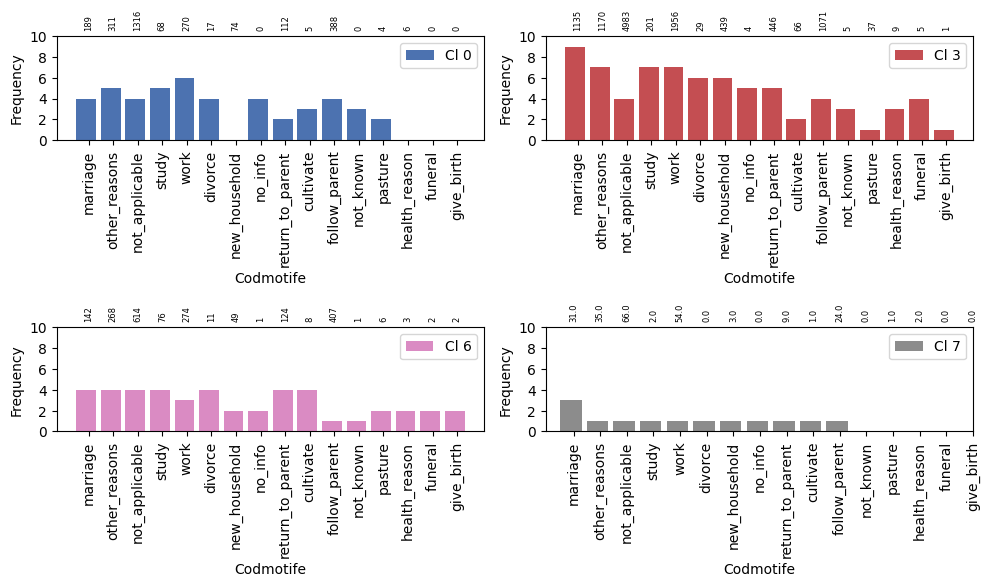

In [69]:
## Try another plot as above
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with your actual data)
reasons_desired_clusters = [0, 3, 6, 7]
x_column = 6
y_column = 38
my_labels = list(df.codmotife.unique())  # Replace with your actual labels

# Filter the dataframe
filtered_df = df[df['cluster'].isin(reasons_desired_clusters)]
filtered_df = filtered_df[(filtered_df['EventCode'] == "IMG")] # & (filtered_df['Frequency'] != 0)]

# Plot setup
n_clusters = len(reasons_desired_clusters)
n_cols = int(len(reasons_desired_clusters) / 2)
n_rows = (n_clusters + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 6))  # Reduce plot size
plt.subplots_adjust(hspace=0.95)  # Increase vertical spacing

palette = sns.color_palette('deep', 10)

# Create a dictionary to store cluster-variable totals
cluster_totals = {}

# Create a dictionary to store cluster colors
cluster_colors = {}
cluster_index = 0

for i in range(n_rows):
    for j in range(n_cols):
        if cluster_index >= n_clusters:
            break

        cluster = reasons_desired_clusters[cluster_index]
        cluster_color = cluster_colors.get(cluster)
        if cluster_color is None:
            cluster_color = palette[cluster]
            cluster_colors[cluster] = cluster_color

        # Get data for the current cluster
        cluster_df = filtered_df[filtered_df['cluster'] == cluster]

        # Ensure all labels are represented in the plot, even with count 0
        for label in my_labels:
            if label not in cluster_df.iloc[:, x_column].astype(str).values:
                # Create a new row for the missing label with count 0 (ensure proper types)
                cluster_df = pd.concat(
                    [cluster_df, pd.DataFrame([{x_column: str(label), y_column: 0}])],
                    ignore_index=True
                )

        # Convert x_column values to strings for the bar plot
        cluster_df.iloc[:, x_column] = cluster_df.iloc[:, x_column].astype(str)

        # Plot bars
        bars = axes[i, j].bar(cluster_df.iloc[:, x_column], cluster_df.iloc[:, y_column], color=cluster_color, label=f'Cl {cluster}')

        # Add labels and title
        axes[i, j].set_ylabel("{}".format(df.columns[y_column]))
        axes[i, j].set_xlabel("{}".format(df.columns[x_column]).capitalize())

        #Set y-axis limit
        # Set y-axis limits and ticks
        axes[i, j].set_ylim(0, 7)  # Set y-axis limit from 0 to 6
        axes[i, j].set_yticks(range(0, 12, 2))  # Set ticks at intervals of 1

        # Calculate x-axis positions based on cluster index
        x_positions = [i + 0.1 for i in range(len(my_labels))]  # Adjust offset as needed

        axes[i, j].set_xticks(x_positions)
        axes[i, j].set_xticklabels(my_labels, rotation=90, ha='center')  # Rotate x-axis labels

        # Calculate and store totals in dictionary, including zeros
        cluster_totals[(cluster, x_column)] = {}  # Key: (cluster, variable column)
        for label in my_labels:
            label_df = cluster_df[cluster_df.iloc[:, x_column] == label]
            total = label_df.iloc[:, y_column].sum()
            # Store the total, even if it's zero
            cluster_totals[(cluster, x_column)][label] = total

        # Add legend
        handles, labels = axes[i, j].get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        axes[i, j].legend([by_label[label] for label in labels], labels, loc='upper right')

        cluster_index += 1

# Manually plot total labels for each subplot
for (cluster, _), label_totals in cluster_totals.items():
    cluster_index = reasons_desired_clusters.index(cluster)
    if cluster_index < n_clusters:  # Ensure cluster index is within bounds
        for label, total in label_totals.items():
            label_index = my_labels.index(label)
            x_pos = x_positions[label_index]
            y_pos = axes[cluster_index// n_cols, cluster_index % n_cols].get_ylim()[1]  # Get max y-limit of the subplot
            y_pos += 0.5  # Adjust y-offset for label placement

            axes[cluster_index // n_cols, cluster_index % n_cols].text(x_pos, y_pos, str(total), rotation=90, ha='center', va='bottom', fontsize=6, color='black')
            #axes[cluster_index, 0].text(x_pos, y_pos, str(total), rotation=90, ha='center', va='bottom', fontsize=6, color='black')

plt.tight_layout()
file_name = "img_numbers_migration_reasons_4_clusters.png"
plt.savefig(file_name, format="png", dpi=500)
plt.show()



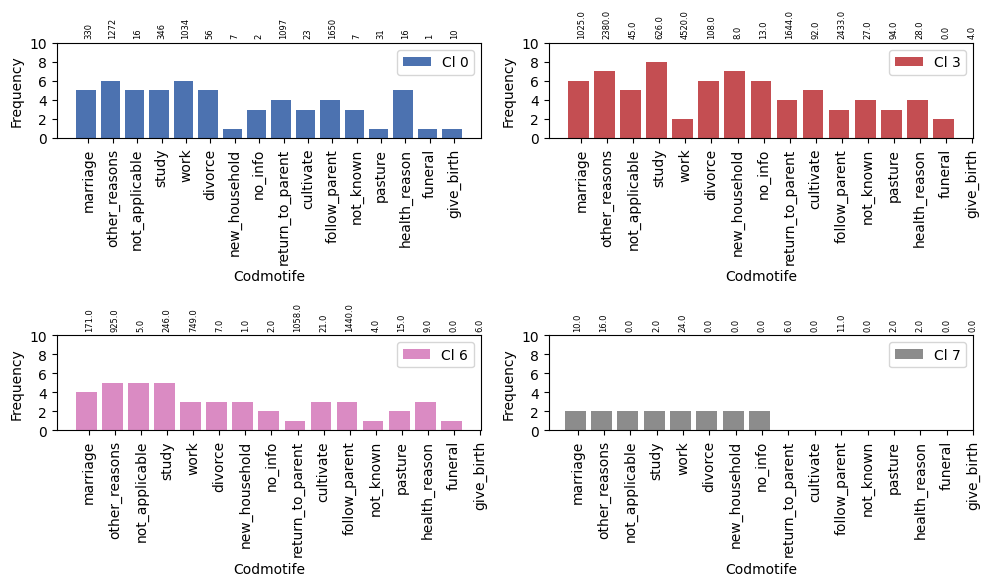

In [70]:
## Try another plot as above
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with your actual data)
reasons_desired_clusters = [0, 3, 6, 7]
x_column = 6
y_column = 38
my_labels = list(df.codmotife.unique())  # Replace with your actual labels

# Filter the dataframe
filtered_df = df[df['cluster'].isin(reasons_desired_clusters)]
filtered_df = filtered_df[(filtered_df['EventCode'] == "OMG")] # & (filtered_df['Frequency'] != 0)]

# Plot setup
n_clusters = len(reasons_desired_clusters)
n_cols = int(len(reasons_desired_clusters) / 2)
n_rows = (n_clusters + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 6))  # Reduce plot size
plt.subplots_adjust(hspace=0.95)  # Increase vertical spacing

palette = sns.color_palette('deep', 10)

# Create a dictionary to store cluster-variable totals
cluster_totals = {}

# Create a dictionary to store cluster colors
cluster_colors = {}
cluster_index = 0

for i in range(n_rows):
    for j in range(n_cols):
        if cluster_index >= n_clusters:
            break

        cluster = reasons_desired_clusters[cluster_index]
        cluster_color = cluster_colors.get(cluster)
        if cluster_color is None:
            cluster_color = palette[cluster]
            cluster_colors[cluster] = cluster_color

        # Get data for the current cluster
        cluster_df = filtered_df[filtered_df['cluster'] == cluster]

        # Ensure all labels are represented in the plot, even with count 0
        for label in my_labels:
            if label not in cluster_df.iloc[:, x_column].astype(str).values:
                # Create a new row for the missing label with count 0 (ensure proper types)
                cluster_df = pd.concat(
                    [cluster_df, pd.DataFrame([{x_column: str(label), y_column: 0}])],
                    ignore_index=True
                )

        # Convert x_column values to strings for the bar plot
        cluster_df.iloc[:, x_column] = cluster_df.iloc[:, x_column].astype(str)

        # Plot bars
        bars = axes[i, j].bar(cluster_df.iloc[:, x_column], cluster_df.iloc[:, y_column], color=cluster_color, label=f'Cl {cluster}')

        # Add labels and title
        axes[i, j].set_ylabel("{}".format(df.columns[y_column]))
        axes[i, j].set_xlabel("{}".format(df.columns[x_column]).capitalize())

        #Set y-axis limit
        # Set y-axis limits and ticks
        axes[i, j].set_ylim(0, 7)  # Set y-axis limit from 0 to 6
        axes[i, j].set_yticks(range(0, 12, 2))  # Set ticks at intervals of 1

        # Calculate x-axis positions based on cluster index
        x_positions = [i + 0.1 for i in range(len(my_labels))]  # Adjust offset as needed

        axes[i, j].set_xticks(x_positions)
        axes[i, j].set_xticklabels(my_labels, rotation=90, ha='center')  # Rotate x-axis labels

        # Calculate and store totals in dictionary, including zeros
        cluster_totals[(cluster, x_column)] = {}  # Key: (cluster, variable column)
        for label in my_labels:
            label_df = cluster_df[cluster_df.iloc[:, x_column] == label]
            total = label_df.iloc[:, y_column].sum()
            # Store the total, even if it's zero
            cluster_totals[(cluster, x_column)][label] = total

        # Add legend
        handles, labels = axes[i, j].get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        axes[i, j].legend([by_label[label] for label in labels], labels, loc='upper right')

        cluster_index += 1

# Manually plot total labels for each subplot
for (cluster, _), label_totals in cluster_totals.items():
    cluster_index = reasons_desired_clusters.index(cluster)
    if cluster_index < n_clusters:  # Ensure cluster index is within bounds
        for label, total in label_totals.items():
            label_index = my_labels.index(label)
            x_pos = x_positions[label_index]
            y_pos = axes[cluster_index// n_cols, cluster_index % n_cols].get_ylim()[1]  # Get max y-limit of the subplot
            y_pos += 0.5  # Adjust y-offset for label placement

            axes[cluster_index // n_cols, cluster_index % n_cols].text(x_pos, y_pos, str(total), rotation=90, ha='center', va='bottom', fontsize=6, color='black')
            #axes[cluster_index, 0].text(x_pos, y_pos, str(total), rotation=90, ha='center', va='bottom', fontsize=6, color='black')

plt.tight_layout()
file_name = "omg_numbers_migration_reasons_4_clusters.png"
plt.savefig(file_name, format="png", dpi=500)
plt.show()



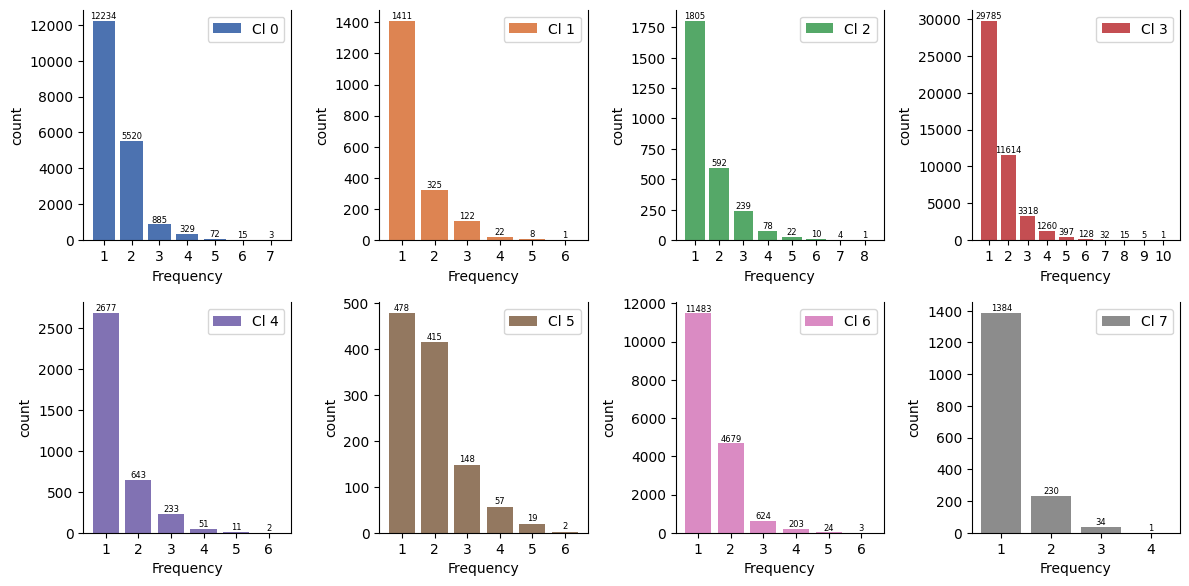

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with your actual data)
reasons_desired_clusters = [0, 1, 2, 3, 4, 5, 6, 7]
x_column = 6
y_column = 38
my_labels = list(df.codmotife.unique())  # Replace with your actual labels

# Filter the dataframe
filtered_df = df[df['cluster'].isin(reasons_desired_clusters)]
#filtered_df = filtered_df[filtered_df['Frequency'] != 0]

# Plot setup
n_clusters = len(reasons_desired_clusters)
n_cols = int(len(reasons_desired_clusters) / 2)
n_rows = (n_clusters + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 6))  # Reduce plot size
plt.subplots_adjust(hspace=2)  # Increase vertical spacing

palette = sns.color_palette('deep', 10)

# Create a dictionary to store cluster-variable totals
cluster_totals = {}

# Create a dictionary to store cluster colors
cluster_colors = {}
cluster_index = 0

for i in range(n_rows):
    for j in range(n_cols):
        if cluster_index >= n_clusters:
            break

        cluster = reasons_desired_clusters[cluster_index]
        cluster_color = cluster_colors.get(cluster)
        if (cluster_color is None):
            cluster_color = palette[cluster]
            cluster_colors[cluster] = cluster_color

        # Check if cluster exists in filtered data before proceeding
        if cluster not in filtered_df['cluster'].unique():
            cluster_index += 1
            continue  # Skip to the next iteration if no data for this cluster

        cluster_df = filtered_df[filtered_df['cluster'] == cluster]

        # Bin the frequencies and count occurrences
        frequency_counts = cluster_df.iloc[:, y_column].value_counts().sort_index()

        # Plot bars
        bars = axes[i, j].bar(frequency_counts.index, frequency_counts.values, color=cluster_color, label=f'Cl {cluster}')

        # Add labels and title
        #axes[i, j].set_ylabel("{}".format(df.columns[y_column]))
        axes[i, j].set_ylabel("count")
        axes[i, j].set_xlabel("Frequency")

        # Set x-ticks to the frequency bins
        axes[i, j].set_xticks(frequency_counts.index)
        axes[i, j].set_xticklabels(frequency_counts.index + 1,  ha='center')  # Rotate x-axis labels

        # Store totals in dictionary
        cluster_totals[cluster] = frequency_counts.to_dict()

        # Add legend
        handles, labels = axes[i, j].get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        axes[i, j].legend([by_label[label] for label in labels], labels, loc='upper right')
        # Remove the top horizontal line
        axes[i, j].spines['top'].set_visible(False)
        
        cluster_index += 1

# Manually plot total labels for each subplot
for cluster, label_totals in cluster_totals.items():
    cluster_index = reasons_desired_clusters.index(cluster)
    if cluster_index < n_clusters:  # Ensure cluster index is within bounds
        for freq, count in label_totals.items():
            x_pos = freq
            y_pos = count + 2  # Adjust y-offset for label placement

            axes[cluster_index // n_cols, cluster_index % n_cols].text(x_pos, y_pos, str(count),  ha='center', va='bottom', fontsize=6, color='black')

plt.tight_layout()  # Adjust spacing between subplots and ensure everything fits
plt.savefig("Frequency_of_migration_kossi.png", dpi=500)
plt.show()


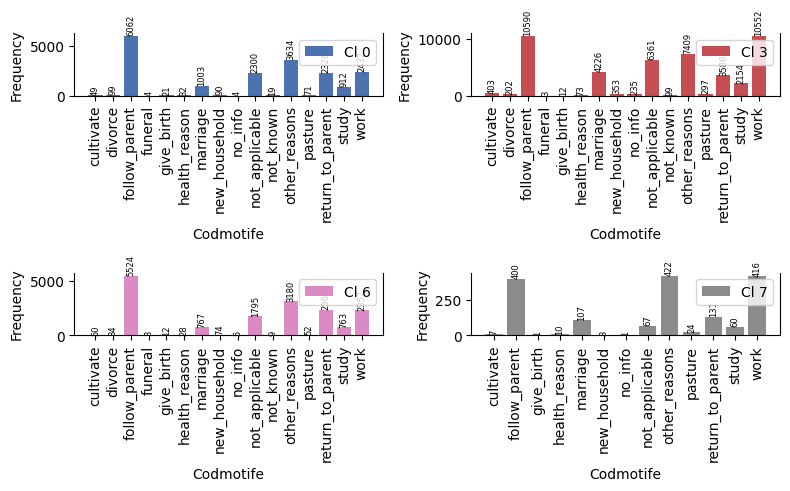

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with your actual data)
reasons_desired_clusters = [0, 3, 6, 7]
x_column = 6
y_column = 38
my_labels = list(df.codmotife.unique())  # Replace with your actual labels

# Filter the dataframe
filtered_df = df[df['cluster'].isin(reasons_desired_clusters)]
#filtered_df = filtered_df[filtered_df['Frequency'] != 0]

# Plot setup
n_clusters = len(reasons_desired_clusters)
n_cols = int(len(reasons_desired_clusters) / 2)
n_rows = (n_clusters + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(8, 5))  # Reduce plot size
plt.subplots_adjust(hspace=2)  # Increase vertical spacing

palette = sns.color_palette('deep', 10)

# Create a dictionary to store cluster-variable totals
cluster_totals = {}

# Create a dictionary to store cluster colors
cluster_colors = {}
cluster_index = 0

for i in range(n_rows):
    for j in range(n_cols):
        if cluster_index >= n_clusters:
            break

        cluster = reasons_desired_clusters[cluster_index]
        cluster_color = cluster_colors.get(cluster)
        if (cluster_color is None):
            cluster_color = palette[cluster]
            cluster_colors[cluster] = cluster_color

        # Check if cluster exists in filtered data before proceeding
        if cluster not in filtered_df['cluster'].unique():
            cluster_index += 1
            continue  # Skip to the next iteration if no data for this cluster

        cluster_df = filtered_df[filtered_df['cluster'] == cluster]

        # Aggregate data to count occurrences of each frequency for each variable
        frequency_counts = cluster_df.groupby(cluster_df.columns[x_column])[cluster_df.columns[y_column]].count()

        # Plot bars
        bars = axes[i, j].bar(frequency_counts.index, frequency_counts.values, color=cluster_color, label=f'Cl {cluster}')

        # Add labels and title
        axes[i, j].set_ylabel("Frequency")
        axes[i, j].set_xlabel("{}".format(df.columns[x_column]).capitalize())

        # Set x-ticks to the variable bins
        axes[i, j].set_xticks(frequency_counts.index)
        axes[i, j].set_xticklabels(frequency_counts.index, rotation=90, ha='center')  # Rotate x-axis labels

        # Store totals in dictionary
        cluster_totals[cluster] = frequency_counts.to_dict()

        # Add legend
        handles, labels = axes[i, j].get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        axes[i, j].legend([by_label[label] for label in labels], labels, loc='upper right')

        # Remove the top horizontal line
        axes[i, j].spines['top'].set_visible(False)

        cluster_index += 1

# Manually plot total labels for each subplot
for cluster, label_totals in cluster_totals.items():
    cluster_index = reasons_desired_clusters.index(cluster)
    if cluster_index < n_clusters:  # Ensure cluster index is within bounds
        for label, total in label_totals.items():
            x_pos = label
            y_pos = total + 0.5  # Adjust y-offset for label placement to avoid covering

            axes[cluster_index // n_cols, cluster_index % n_cols].text(x_pos, y_pos, str(total), rotation=90, ha='center', va='bottom', fontsize=6, color='black')

plt.tight_layout()  # Adjust spacing between subplots and ensure everything fits
plt.show()


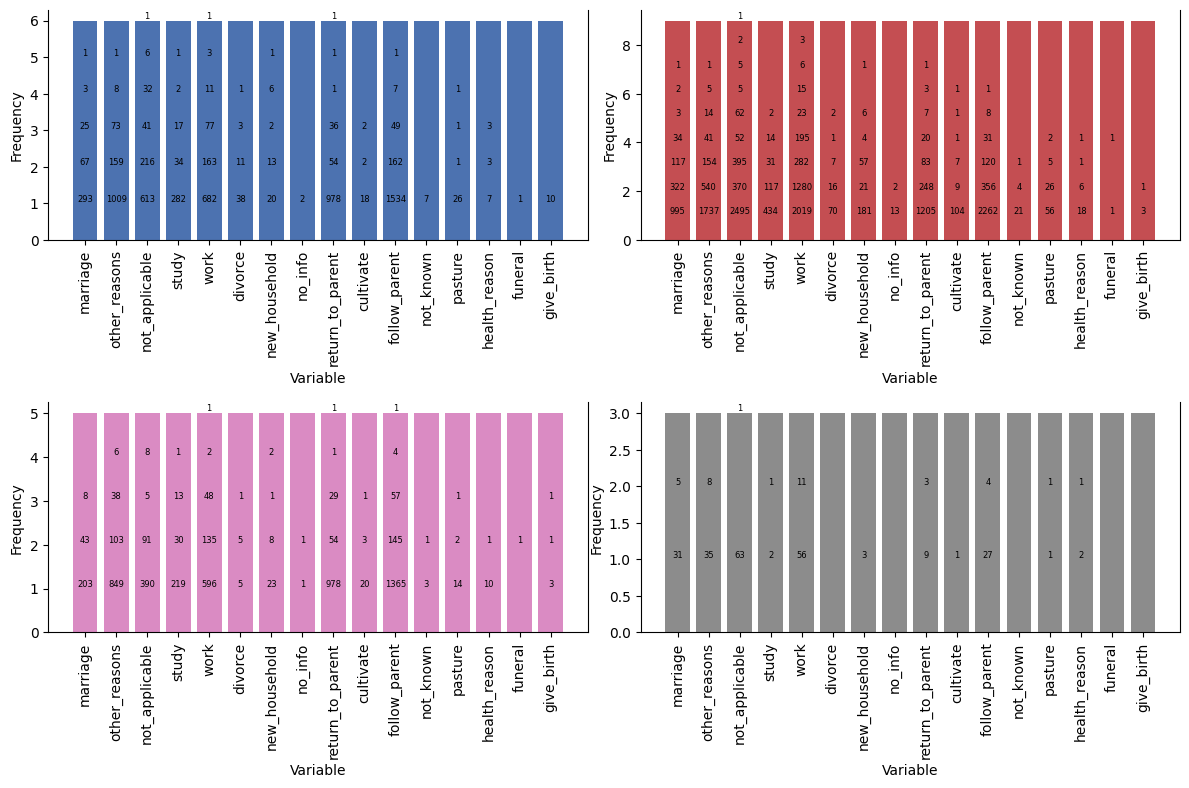

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with your actual data)
reasons_desired_clusters = [0, 3, 6, 7]
x_column = 6
y_column = 38
my_labels = list(df.codmotife.unique())  # Replace with your actual labels

# Filter the dataframe
filtered_df = df[df['cluster'].isin(reasons_desired_clusters)]
filtered_df = filtered_df[filtered_df['Frequency'] != 0]

# Plot setup
n_clusters = len(reasons_desired_clusters)
n_cols = int(len(reasons_desired_clusters) / 2)
n_rows = (n_clusters + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 8))  # Adjusted plot size
plt.subplots_adjust(hspace=2)  # Increase vertical spacing

palette = sns.color_palette('deep', 10)

# Create a dictionary to store cluster colors
cluster_colors = {}
cluster_index = 0

for i in range(n_rows):
    for j in range(n_cols):
        if cluster_index >= n_clusters:
            break

        cluster = reasons_desired_clusters[cluster_index]
        cluster_color = cluster_colors.get(cluster)
        if cluster_color is None:
            cluster_color = palette[cluster]
            cluster_colors[cluster] = cluster_color

        # Check if cluster exists in filtered data before proceeding
        if cluster not in filtered_df['cluster'].unique():
            cluster_index += 1
            continue  # Skip to the next iteration if no data for this cluster

        cluster_df = filtered_df[filtered_df['cluster'] == cluster]

        # Plot setup for the current subplot
        ax = axes[i, j]
        ax.spines['top'].set_visible(False)

        # Loop through each variable to plot its frequency counts
        for label in my_labels:
            # Filter for the current variable
            variable_df = cluster_df[cluster_df['codmotife'] == label]

            # Group by frequency and count the occurrences
            frequency_totals = variable_df.groupby(variable_df.columns[y_column]).size()

            # Plot bars for the variable's frequencies
            bars = ax.bar(label,  cluster_df.iloc[:, y_column], color=cluster_color, label=f'Cl {cluster} - {label}')

            # Annotate bars with the frequency count
            for freq, count in frequency_totals.items():
                ax.text(label, freq, str(count), ha='center', va='bottom', fontsize=6, color='black')

        # Add labels and title
        ax.set_ylabel("Frequency")
        ax.set_xlabel("Variable")
        ax.set_xticks(range(len(my_labels)))
        ax.set_xticklabels(my_labels, rotation=90, ha='center')  # Rotate x-axis labels

        # Add legend
        handles, labels = ax.get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        #ax.legend(by_label.values(), by_label.keys(), loc='upper right')

        cluster_index += 1

plt.tight_layout()  # Adjust spacing between subplots and ensure everything fits
plt.show()


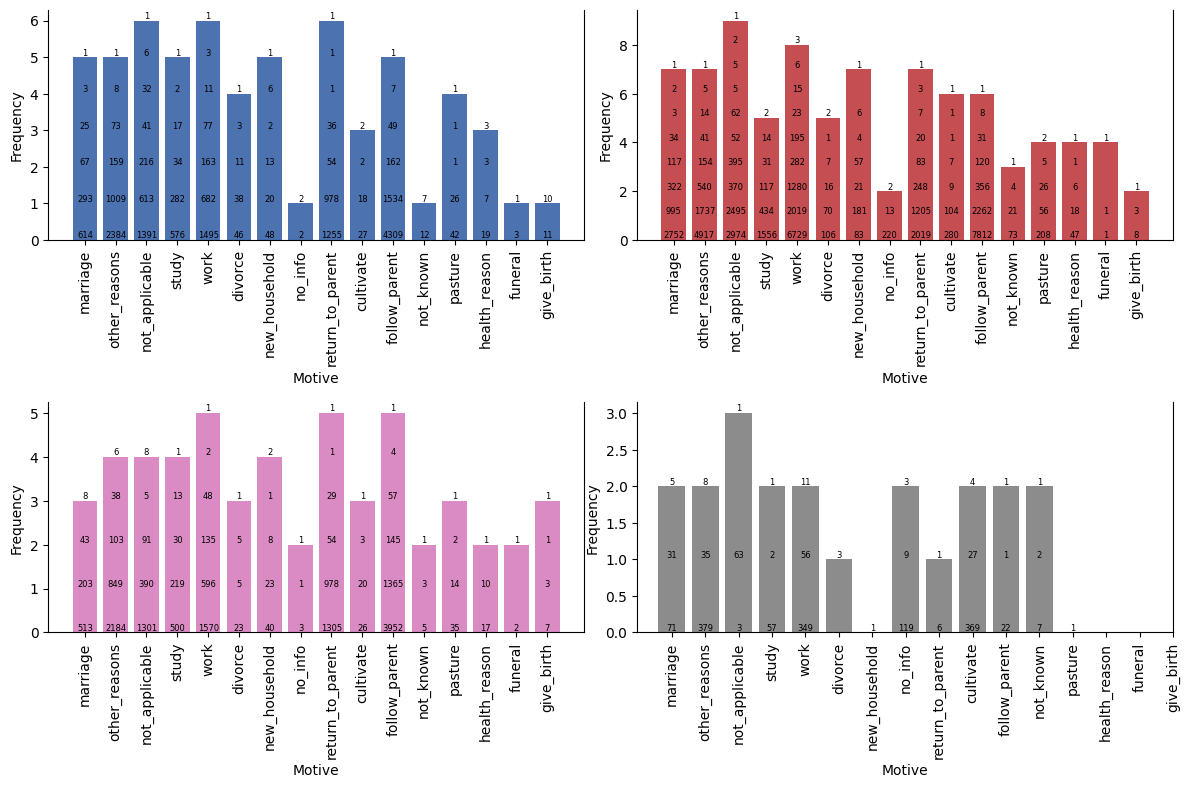

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with your actual data)
reasons_desired_clusters = [0, 3, 6, 7]
x_column = 6
y_column = 38
my_labels = list(df.codmotife.unique())  # Replace with your actual labels

# Filter the dataframe
filtered_df = df[df['cluster'].isin(reasons_desired_clusters)]
#filtered_df = filtered_df[filtered_df['Frequency'] != 0]

# Plot setup
n_clusters = len(reasons_desired_clusters)
n_cols = int(len(reasons_desired_clusters) / 2)
n_rows = (n_clusters + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 8))  # Adjusted plot size
plt.subplots_adjust(hspace=2)  # Increase vertical spacing

palette = sns.color_palette('deep', 10)

# Create a dictionary to store cluster colors
cluster_colors = {}
cluster_index = 0

for i in range(n_rows):
    for j in range(n_cols):
        if cluster_index >= n_clusters:
            break

        cluster = reasons_desired_clusters[cluster_index]
        cluster_color = cluster_colors.get(cluster)
        if cluster_color is None:
            cluster_color = palette[cluster]
            cluster_colors[cluster] = cluster_color

        # Check if cluster exists in filtered data before proceeding
        if cluster not in filtered_df['cluster'].unique():
            cluster_index += 1
            continue  # Skip to the next iteration if no data for this cluster

        cluster_df = filtered_df[filtered_df['cluster'] == cluster]

        # Plot setup for the current subplot
        ax = axes[i, j]
        ax.spines['top'].set_visible(False)

        # Loop through each variable to plot its frequency counts
        for label in my_labels:
            # Filter for the current variable
            variable_df = cluster_df[cluster_df['codmotife'] == label]

            # Group by frequency and count the occurrences
            frequency_totals = variable_df.groupby(variable_df.columns[y_column]).size()

            # Plot bars for the variable's frequencies
            for freq, count in frequency_totals.items():
                bars = ax.bar(label, freq, color=cluster_color, label=f'Cl {cluster} - {label}')

                # Annotate bars with the frequency count
                ax.text(label, freq, str(count), ha='center', va='bottom', fontsize=6, color='black')

        # Add labels and title
        ax.set_ylabel("Frequency")
        ax.set_xlabel("Motive")
        ax.set_xticks(range(len(my_labels)))
        ax.set_xticklabels(my_labels, rotation=90, ha='center')  # Rotate x-axis labels

        # Add legend
        handles, labels = ax.get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        #ax.legend(by_label.values(), by_label.keys(), loc='upper right')

        cluster_index += 1

plt.tight_layout()  # Adjust spacing between subplots and ensure everything fits
plt.savefig("total_frequency_reasons.png", dpi=500)
plt.show()


## Important CLuster IN migration reasons

Cluster: 0 Count: 1835
Cluster: 3 Count: 8077
Cluster: 6 Count: 1446
Cluster: 7 Count: 1613


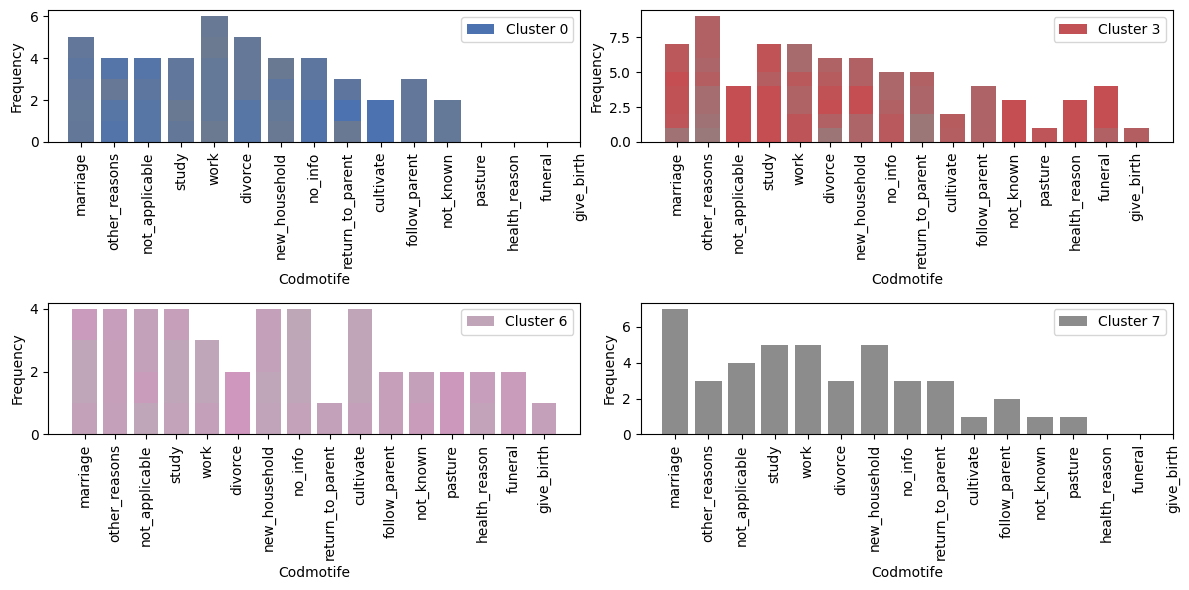

{0: (0.2980392156862745, 0.4470588235294118, 0.6901960784313725), 3: (0.7686274509803922, 0.3058823529411765, 0.3215686274509804), 6: (0.8549019607843137, 0.5450980392156862, 0.7647058823529411), 7: (0.5490196078431373, 0.5490196078431373, 0.5490196078431373)}


In [59]:
#Plot Each cluster with kernerl density distribution
#Filter desired clusters
#cust_desired_clusters = [0,1,2,3,4,5,6,7]
c_desired_clusters = [0,3,6,7]
x_column = 6
y_column = 38
my_labels = list(df.codmotife.unique())

#filtered_df = df[df['cluster'].isin(cust_desired_clusters)]
filtered_df = df[df['cluster'].isin(c_desired_clusters) & (df['EventCode'] == "IMG")]
filtered_df = filtered_df[filtered_df['Frequency'] !=0]
filtered_df.groupby('IndividualId')['Frequency'].max().reset_index()

#Print the total count of each cluster in the filtered dataframe
for cluster in sorted(filtered_df['cluster'].unique()):
    count =filtered_df[filtered_df['cluster'] == cluster].shape[0]
    print(f"Cluster: {cluster} Count: {count}")
#Plot for each cluster
#Create the scatter plot with color bavsed on member color
#n_clusters = len(cust_desired_clusters)
n_clusters = len(c_desired_clusters)
#n_rows = int(n_clusters / 4) + (n_clusters % 4)
n_cols = int(len(c_desired_clusters)/2) #int(n_clusters / 4) + (n_clusters % 4)
n_rows = (n_clusters + n_cols - 1) // n_cols 

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12,6))
plt.subplots_adjust(hspace=0.8)
palette=sns.color_palette('deep', 10)
#cluster_color = palette[cluster]
#AGe
threshold_age = 40
# Create a dictionary to store cluster colors
cluster_colors = {}
#Plot each
cluster_index = 0
for i in range(n_rows):
    for j in range(n_cols):
        if cluster_index >= n_clusters:
            break #No more clusters
        #cluster = cust_desired_clusters[cluster_index]
        cluster = c_desired_clusters[cluster_index]
        #for cluster in sorted(filtered_df['cluster'].unique()):
        ###cluster_df =filtered_df[filtered_df['cluster'] == cluster]
        cluster_color = cluster_colors.get(cluster)
        if cluster_color is None:
            cluster_color = palette[cluster]
            cluster_colors[cluster] = cluster_color #save for downstream use
        cluster_df = filtered_df[filtered_df['cluster'] == cluster]

        #KDE to estimate smooth distribution
        # x = cluster_df.iloc[:, x_column]
        # kde_xs = np.linspace(x.min(), x.max(), 200) #Adjust the number of points for smooth curves
        # kde_ys = gaussian_kde(x)(kde_xs)

        #Plot
        member_colors = cluster_df['member_color'].to_numpy()
        #axes[i, j].plot(kde_xs, kde_ys, label=f'Cluster {cluster}', color=cluster_color)#color=member_colors[0])
        
        #axes[i, j].scatter(cluster_df.iloc[:,x_column], cluster_df.iloc[:, y_column], c=cluster_df.iloc[:, 42], label=f'Cluster {cluster}')
        axes[i, j].bar(cluster_df.iloc[:,x_column], cluster_df.iloc[:, y_column], color=cluster_df.iloc[:, 42], label=f'Cluster {cluster}') #,c=cluster_df.iloc[:, 42],)
        #Add labels and title
        #axes[i, j].set_title("A graph of cluster {}".format(cluster_index))
        axes[i, j].set_ylabel("{}".format(df.columns[y_column]))
        axes[i, j].set_xlabel("{}".format(df.columns[x_column]).capitalize())
        axes[i, j].set_xticks(range(len(my_labels)))
        axes[i, j].set_xticklabels(my_labels, rotation=90, ha='center')
        
        #Draw the threshold line using axhline()
        #axes[i, j].axhline(y=threshold_age, color='red', linestyle='--', linewidth=1) #, label=f'Threshold" Age = {threshold_age}')
        #Order the legend based on cluster number
        #handles, labels = plt.gca().get_legend_handles_labels()
        handles, labels = axes[i, j].get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        #labels.sort(key=lambda x: int(x.split()[1]))
        axes[i, j].legend([by_label[label] for label in labels], labels, loc='upper right') #, title='Cluster Labels')
        cluster_index += 1
#Add general title
#fig.suptitle("Graph of codmotife vs Frequency for IN migration events", fontsize=16)
plt.tight_layout()
#plt.xticks(rotation=90)
#file_name = "age_mobility2.png"
file_name = "clister_in_migration_reasons.png"
plt.savefig(file_name, format="png", dpi=500)
plt.show()

print(cluster_colors)

## Important CLuster OUT migration reasons

Cluster: 0 Count: 4989
Cluster: 3 Count: 8693
Cluster: 6 Count: 4087
Cluster: 7 Count: 6353


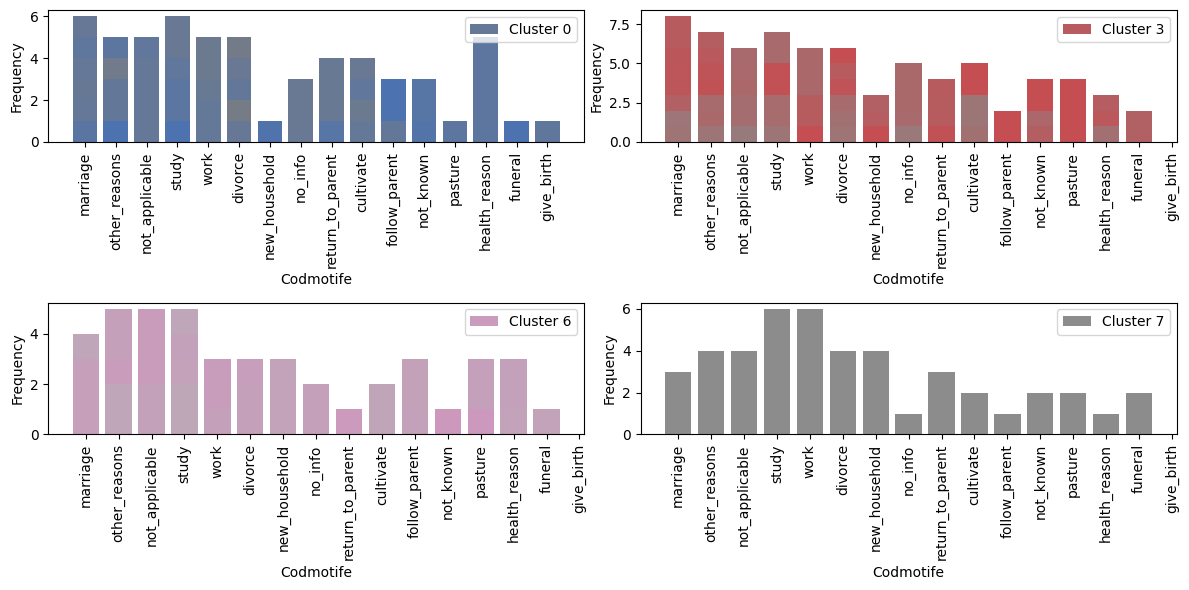

{0: (0.2980392156862745, 0.4470588235294118, 0.6901960784313725), 3: (0.7686274509803922, 0.3058823529411765, 0.3215686274509804), 6: (0.8549019607843137, 0.5450980392156862, 0.7647058823529411), 7: (0.5490196078431373, 0.5490196078431373, 0.5490196078431373)}


In [58]:
#Plot Each cluster with kernerl density distribution
#Filter desired clusters
#cust_desired_clusters = [0,1,2,3,4,5,6,7]
c_desired_clusters = [0,3,6,7]
x_column = 6
y_column = 38
my_labels = list(df.codmotife.unique())

#filtered_df = df[df['cluster'].isin(cust_desired_clusters)]
filtered_df = df[df['cluster'].isin(c_desired_clusters) & (df['EventCode'] == "OMG")]
filtered_df = filtered_df[filtered_df['Frequency'] !=0]
filtered_df.groupby('IndividualId')['Frequency'].max().reset_index()

#Print the total count of each cluster in the filtered dataframe
for cluster in sorted(filtered_df['cluster'].unique()):
    count =filtered_df[filtered_df['cluster'] == cluster].shape[0]
    print(f"Cluster: {cluster} Count: {count}")
#Plot for each cluster
#Create the scatter plot with color bavsed on member color
#n_clusters = len(cust_desired_clusters)
n_clusters = len(c_desired_clusters)
#n_rows = int(n_clusters / 4) + (n_clusters % 4)
n_cols = int(len(c_desired_clusters)/2) #int(n_clusters / 4) + (n_clusters % 4)
n_rows = (n_clusters + n_cols - 1) // n_cols 

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12,6))
plt.subplots_adjust(hspace=0.8)
palette=sns.color_palette('deep', 10)
#cluster_color = palette[cluster]
#AGe
threshold_age = 40
# Create a dictionary to store cluster colors
cluster_colors = {}
#Plot each
cluster_index = 0
for i in range(n_rows):
    for j in range(n_cols):
        if cluster_index >= n_clusters:
            break #No more clusters
        #cluster = cust_desired_clusters[cluster_index]
        cluster = c_desired_clusters[cluster_index]
        #for cluster in sorted(filtered_df['cluster'].unique()):
        ###cluster_df =filtered_df[filtered_df['cluster'] == cluster]
        cluster_color = cluster_colors.get(cluster)
        if cluster_color is None:
            cluster_color = palette[cluster]
            cluster_colors[cluster] = cluster_color #save for downstream use
        cluster_df = filtered_df[filtered_df['cluster'] == cluster]

        #KDE to estimate smooth distribution
        # x = cluster_df.iloc[:, x_column]
        # kde_xs = np.linspace(x.min(), x.max(), 200) #Adjust the number of points for smooth curves
        # kde_ys = gaussian_kde(x)(kde_xs)

        #Plot
        member_colors = cluster_df['member_color'].to_numpy()
        #axes[i, j].plot(kde_xs, kde_ys, label=f'Cluster {cluster}', color=cluster_color)#color=member_colors[0])
        
        #axes[i, j].scatter(cluster_df.iloc[:,x_column], cluster_df.iloc[:, y_column], c=cluster_df.iloc[:, 42], label=f'Cluster {cluster}')
        axes[i, j].bar(cluster_df.iloc[:,x_column], cluster_df.iloc[:, y_column], color=cluster_df.iloc[:, 42], label=f'Cluster {cluster}') #,c=cluster_df.iloc[:, 42],)
        #Add labels and title
        #axes[i, j].set_title("A graph of cluster {}".format(cluster_index))
        axes[i, j].set_ylabel("{}".format(df.columns[y_column]))
        axes[i, j].set_xlabel("{}".format(df.columns[x_column]).capitalize())
        axes[i, j].set_xticks(range(len(my_labels)))
        axes[i, j].set_xticklabels(my_labels, rotation=90, ha='center')
        
        #Draw the threshold line using axhline()
        #axes[i, j].axhline(y=threshold_age, color='red', linestyle='--', linewidth=1) #, label=f'Threshold" Age = {threshold_age}')
        #Order the legend based on cluster number
        #handles, labels = plt.gca().get_legend_handles_labels()
        handles, labels = axes[i, j].get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        #labels.sort(key=lambda x: int(x.split()[1]))
        axes[i, j].legend([by_label[label] for label in labels], labels, loc='upper right') #, title='Cluster Labels')
        cluster_index += 1
#Add general title
#fig.suptitle("Graph of migration motive vs Frequency for OUT migration Events", fontsize=16)
plt.tight_layout()
#plt.xticks(rotation=90)
#file_name = "age_mobility2.png"
file_name = "clister_out_migration_reasons.png"
plt.savefig(file_name, format="png", dpi=500)
plt.show()

print(cluster_colors)

In [ ]:
filtered_df = df[(df['cluster'].isin(desired_clusters)) & (df['EventCode'] == "IMG")]
desired_clusters = [0,1,2,3,4,5,6,7]
year_df = filtered_df.groupby(['Event_Year', 'EventCode', 'cluster'])['IndividualId'].count().unstack().fillna(0)
year_df

In [ ]:
#desired_clusters = [0,1,2,3,4,5,6,7]
desired_clusters = [0,3,6,7]

filtered_df = df[df['cluster'].isin(desired_clusters)]

year_df = filtered_df.groupby(['Event_Year', 'EventCode', 'cluster'])['IndividualId'].count().unstack().fillna(0)
# Create the bar chart
fig, ax = plt.subplots(figsize=(12,12))
year_df.plot.bar(ax=ax, stacked=True, color=cluster_colors)
ax.set_xlabel("Event Year")
ax.set_ylabel("Count")
ax.set_title("Stacked Bar Graph of Migration Events for Each Cluster")
plt.legend(title="Cluster")
plt.savefig("images/all_in_out_mig_7.png", dpi=500)
plt.tight_layout()
plt.show()

## New Selected Clusters

In [ ]:
new_desired_clusterss = [0,3,6,7]

filtered_df = df[df['cluster'].isin(new_desired_clusterss)]

new_year_df = filtered_df.groupby(['Event_Year', 'EventCode', 'cluster'])['IndividualId'].count().unstack().fillna(0)
# Create the bar chart
fig, ax = plt.subplots(figsize=(12,12))
new_year_df.plot.bar(ax=ax, stacked=True, color=cluster_colors)
ax.set_xlabel("Event Year")
ax.set_ylabel("Count")
ax.set_title("Stacked Bar Graph of Migration Events for Each Cluster")
plt.legend(title="Cluster")
plt.savefig("images/all_in_out_mig_new.png", dpi=500)
plt.tight_layout()
plt.show()

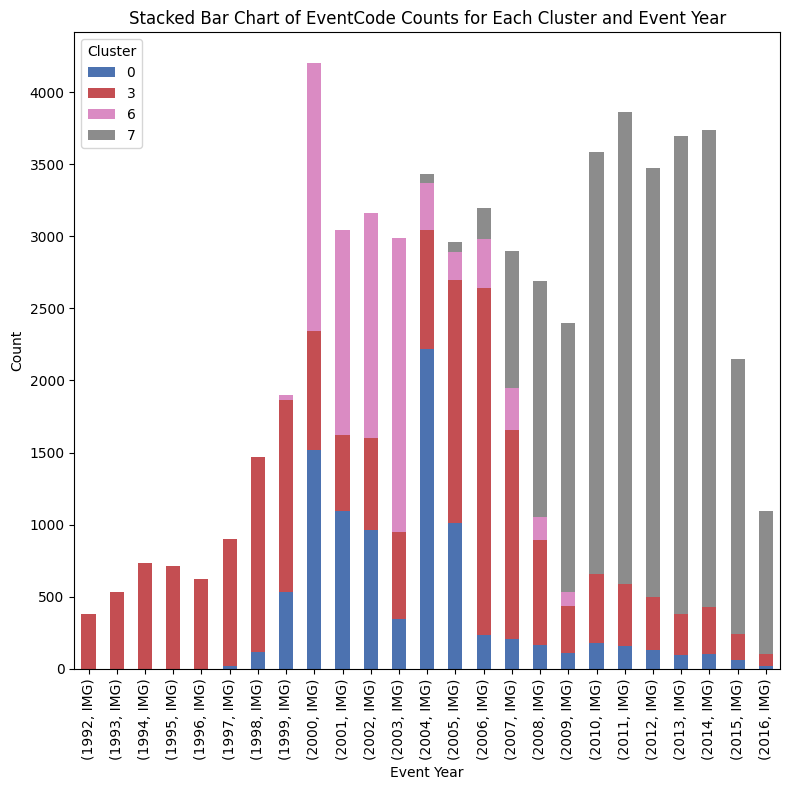

In [62]:
#desired_clusters = [0,1,2,3,4,5,6,7]
desired_clusters
filtered_df = df[(df['cluster'].isin(desired_clusters)) & (df['EventCode'] == "IMG")] 
year_df = filtered_df.groupby(['Event_Year', 'EventCode', 'cluster'])['IndividualId'].count().unstack().fillna(0)
# Create the bar chart
fig, ax = plt.subplots(figsize=(8,8))
year_df.plot.bar(ax=ax, stacked=True, color=cluster_colors)
ax.set_xlabel("Event Year")
ax.set_ylabel("Count")
ax.set_title("Stacked Bar Chart of EventCode Counts for Each Cluster and Event Year")
plt.legend(title="Cluster")
plt.savefig("images/chosen_clusters_overview.png", dpi=500)

plt.tight_layout()
plt.show()

In [ ]:
### In Migrations, precipitations and Event_Month

In [ ]:
#Plot Each cluster with kernerl density distribution
#Filter desired clusters
filtered_df = df[(df['cluster'].isin(desired_clusters))  & (df['EventCode'] == "IMG")] 
#filtered_df = df[(df['cluster'].isin(desired_clusters)) & (df['EventCode'] == 1)] 
desired_clusters = [0,1,2,3,4,5,6,7]
x_column = 18
y_column = 14

#Create the scatter plot with color based on member color
n_clusters = len(desired_clusters)
n_cols =2
n_rows=n_rows = (n_clusters + n_cols - 1) // n_cols 
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12,6))
#plt.subplots_adjust(hspace=0.8)
palette = sns.color_palette('deep', 10)
#AGe
threshold_age = 40

#Plot each
cluster_index = 0
for i in range(n_rows):
    for j in range(n_cols):
        if cluster_index >= n_clusters:
            break #No more clusters
        cluster = desired_clusters[cluster_index]
        cluster_df =filtered_df[filtered_df['cluster'] == cluster]
        cluster_colorss = palette[cluster]
        axes[i, j].bar(cluster_df.iloc[:,x_column], cluster_df.iloc[:, y_column], color=cluster_colorss, label=f'Cluster {cluster}') #,c=cluster_df.iloc[:, 42],)
        axes[i, j].set_ylabel("{}".format(df.columns[y_column]))
        axes[i, j].set_xlabel("{}".format(df.columns[x_column]))

        handles, labels = axes[i, j].get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        #labels.sort(key=lambda x: int(x.split()[1]))
        axes[i, j].legend([by_label[label] for label in labels], labels, loc='upper right') #, title='Cluster Labels')
        cluster_index += 1
#Add general title
fig.suptitle("Scatter Plots of Clusters, Ordered and Colored by Member Color", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
#desired_all_clusteras = [0,3,6,7]
weather_filtered_df = df[(df['cluster'].isin([0,3,6,7]))  & (df['EventCode'] == "IMG")]
n_clusters = len(desired_all_clusteras)
#n_rows = int(n_clusters / 4) + (n_clusters % 4)
n_cols = 2
n_rows = (n_clusters + n_cols - 1) // n_cols  # Calculate required rows

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12,6))
plt.subplots_adjust(hspace=1.8)
palette_w = sns.color_palette('deep', 10)
# #AGe
# threshold_age = 40

#Plot each
cluster_index = 0
for i in range(n_rows):
    for j in range(n_cols):
        if cluster_index >= n_clusters:
            break #No more clusters
        cluster = desired_clusters[cluster_index]
        #for cluster in sorted(filtered_df['cluster'].unique()):
        cluster_df =filtered_df[filtered_df['cluster'] == cluster]
        cluster_w_color = palette_w[cluster]
        print(cluster_w_color)
        #KDE to estimate smooth distribution
        x = cluster_df.iloc[:, x_column]
        kde_xs = np.linspace(x.min(), x.max(), 50) #Adjust the number of points for smooth curves
        kde_ys = gaussian_kde(x)(kde_xs)

        #Plot
        #member_colors = cluster_df['member_color'].to_numpy()
        #axes[i, j].plot(kde_xs, kde_ys, label=f'Cluster {cluster}', color=cluster_w_color) #color=member_colors[0])

        
        axes[i, j].scatter(cluster_df.iloc[:,x_column], cluster_df.iloc[:, y_column], color=cluster_w_color, label=f'Cluster {cluster}') #,c=cluster_df.iloc[:, 42],)
        #Add labels and title
        #axes[i, j].set_title("A graph of cluster {}".format(cluster_index))
        axes[i, j].set_ylabel("{}".format(df.columns[y_column]))
        axes[i, j].set_xlabel("{}".format(df.columns[x_column]))

        #Draw the threshold line using axhline()
        #axes[i, j].axhline(y=threshold_age, color='red', linestyle='--', linewidth=1) #, label=f'Threshold" Age = {threshold_age}')
        #Order the legend based on cluster number
        #handles, labels = plt.gca().get_legend_handles_labels()
        handles, labels = axes[i, j].get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        #labels.sort(key=lambda x: int(x.split()[1]))
        axes[i, j].legend([by_label[label] for label in labels], labels)#,  bbox_to_anchor=(0.9,1.3)) #, title='Cluster Labels')

        cluster_index += 1
#Add general title
fig.suptitle("Scatter Plots of Clusters, Ordered and Colored by Member Color", fontsize=16)
plt.tight_layout()
#file_name = "age_time.png"
#plt.savefig(file_name, format="png", dpi=500)
plt.show()

In [ ]:
#desired_all_clusters = [0,1,2,3,4,5,6,7]
desired_all_clusteras = [14,3,6,7]
x_column = 18
y_column = 14

print(df.columns[x_column])
print("\n",df.columns[y_column])

weather_filtered_df = df[(df['cluster'].isin(desired_all_clusteras))  & (df['EventCode'] == "IMG")] # & (df['Beforeseen'] !=0)]
#weather_filtered_df.groupby('Prec')['Beforeseen'].max().reset_index()

#Print the total count of each cluster in the filtered dataframe
for cluster in sorted(weather_filtered_df['cluster'].unique()):
    count =weather_filtered_df[weather_filtered_df['cluster'] == cluster].shape[0]
    print(f"Cluster: {cluster} Count: {count}")

#Plot for each cluster

#Create the scatter plot with color based on member color
n_clusters = len(desired_all_clusteras)
#n_rows = int(n_clusters / 4) + (n_clusters % 4)
n_cols = 2
n_rows = (n_clusters + n_cols - 1) // n_cols  # Calculate required rows

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12,6))
plt.subplots_adjust(hspace=1.8)
w_palette = sns.color_palette('deep', 10)
# #AGe
# threshold_age = 40

#Plot each
cluster_index = 0
for i in range(n_rows):
    for j in range(n_cols):
        if cluster_index >= n_clusters:
            break #No more clusters
        cluster = desired_clusters[cluster_index]
        #for cluster in sorted(filtered_df['cluster'].unique()):
        cluster_df =filtered_df[filtered_df['cluster'] == cluster]
        cluster_w_color = w_palette[cluster]
        #KDE to estimate smooth distribution
        x = cluster_df.iloc[:, x_column]
        kde_xs = np.linspace(x.min(), x.max(), 50) #Adjust the number of points for smooth curves
        kde_ys = gaussian_kde(x)(kde_xs)

        #Plot
        #member_colors = cluster_df['member_color'].to_numpy()
        axes[i, j].plot(kde_xs, kde_ys, label=f'Cluster {cluster}', color=cluster_w_color) #color=member_colors[0])

        
        #axes[i, j].scatter(cluster_df.iloc[:,x_column], cluster_df.iloc[:, y_column], color=cluster_w_color, label=f'Cluster {cluster}') #,c=cluster_df.iloc[:, 42],)
        #Add labels and title
        #axes[i, j].set_title("A graph of cluster {}".format(cluster_index))
        axes[i, j].set_ylabel("{}".format(df.columns[y_column]))
        axes[i, j].set_xlabel("{}".format(df.columns[x_column]))

        #Draw the threshold line using axhline()
        #axes[i, j].axhline(y=threshold_age, color='red', linestyle='--', linewidth=1) #, label=f'Threshold" Age = {threshold_age}')
        #Order the legend based on cluster number
        #handles, labels = plt.gca().get_legend_handles_labels()
        handles, labels = axes[i, j].get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        #labels.sort(key=lambda x: int(x.split()[1]))
        axes[i, j].legend([by_label[label] for label in labels], labels)#,  bbox_to_anchor=(0.9,1.3)) #, title='Cluster Labels')

        cluster_index += 1
#Add general title
fig.suptitle("Scatter Plots of Clusters, Ordered and Colored by Member Color", fontsize=16)
plt.tight_layout()
#file_name = "age_time.png"
#plt.savefig(file_name, format="png", dpi=500)
plt.show()

## Climate and Weather variables

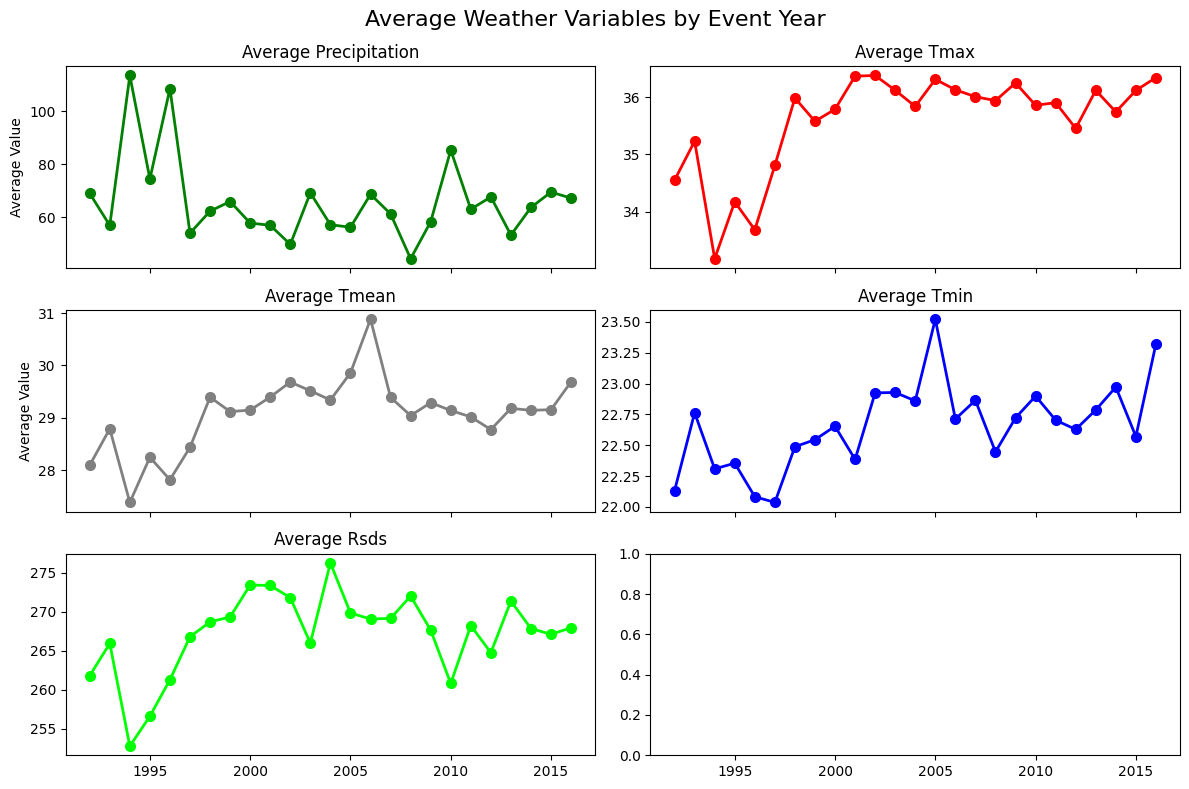

In [139]:
average_prec = df.groupby('Event_Year')['Prec'].mean()
average_tmin = df.groupby('Event_Year')['Tmin'].mean()
average_tmean = df.groupby('Event_Year')['Tmean'].mean()
average_tmax = df.groupby('Event_Year')['Tmax'].mean()
average_rsds = df.groupby('Event_Year')['Rsds'].mean()
 
# Creating subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 8), sharex=True)

# Plotting average Prec in the first subplot
#axs[0].bar(average_prec.index, average_prec, color='skyblue', alpha=0.7, label='Average Prec')
axs[0,0].plot(average_prec.index, average_prec, marker='o', color='green', linewidth=2, markersize=7)
axs[0, 0].set_title('Average Precipitation')
axs[0, 0].set_ylabel('Average Value')
#axs[0, 0].set_xticks(average_prec.index)

axs[0, 1].plot(average_tmax.index, average_tmax, marker='o', color='red', linewidth=2, markersize=7)
axs[0, 1].set_title('Average Tmax')
#axs[0, 1].set_xticks(average_tmax.index)

# Plotting average Tmin in the second subplot
#axs[1].bar(average_tmin.index, average_tmin, color='lightgreen', alpha=0.7, label='Average Tmin')
axs[1, 0].plot(average_tmean.index, average_tmean, marker='o', color='grey', linewidth=2, markersize=7)
axs[1, 0].set_title('Average Tmean')
axs[1, 0].set_ylabel('Average Value')
#axs[1, 0].set_xticklabels(average_tmean.index, rotation=45, ha='right')

axs[1, 1].plot(average_tmin.index, average_tmin, marker='o', color='blue', linewidth=2, markersize=7)
axs[1, 1].set_title('Average Tmin')
#axs[1, 1].set_xticklabels(average_tmean.index, rotation=45, ha='right')

axs[2, 0].plot(average_rsds.index, average_rsds, marker='o', color='lime', linewidth=2, markersize=7)
axs[2, 0].set_title('Average Rsds')

# Adding titles and labels
fig.suptitle('Average Weather Variables by Event Year', fontsize=16)
# for ax in axs.flat:
#     ax.set_ylabel('Average Prec')
#     ax.set_ylabel('Average Value')
#     plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.savefig('images/yearly_weather_variables.png', dpi=500)
plt.show()

## By Event_Month

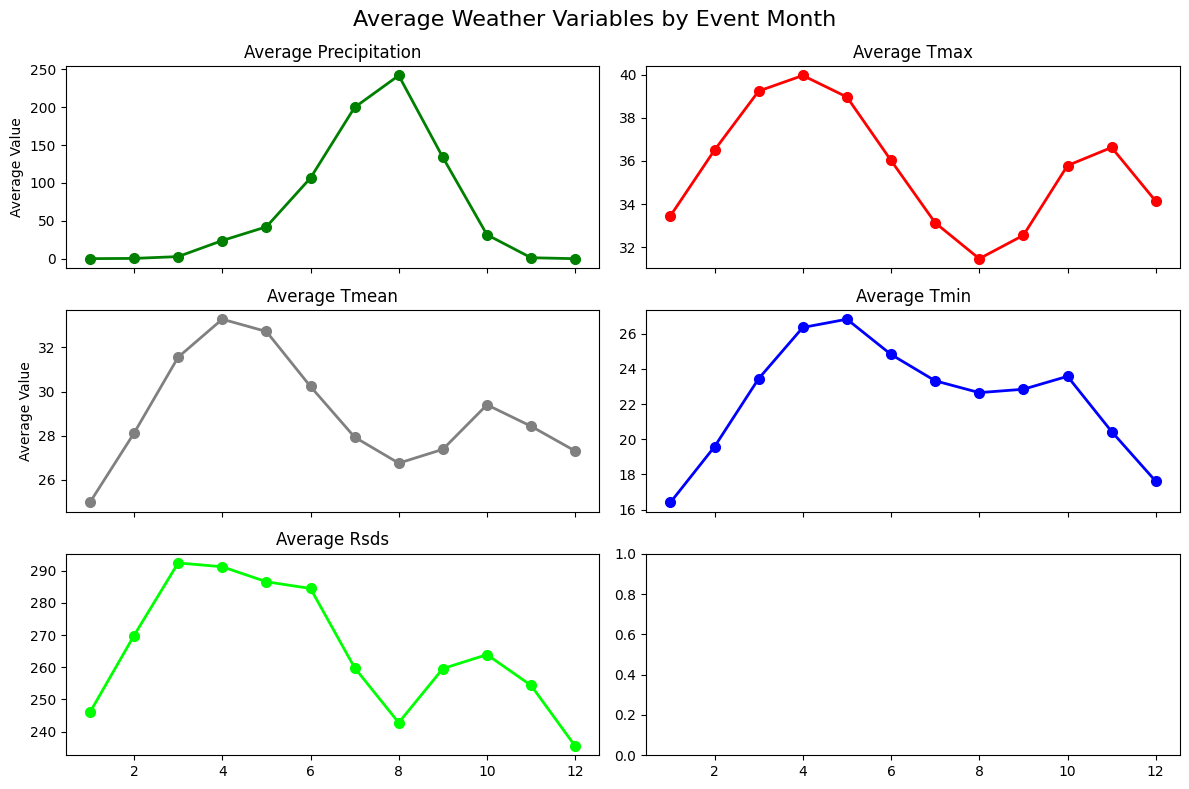

In [138]:
average_prec = df.groupby('Event_Month')['Prec'].mean()
average_tmin = df.groupby('Event_Month')['Tmin'].mean()
average_tmean = df.groupby('Event_Month')['Tmean'].mean()
average_tmax = df.groupby('Event_Month')['Tmax'].mean()
average_rsds = df.groupby('Event_Month')['Rsds'].mean()

# Creating subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 8), sharex=True)

# Plotting average Prec in the first subplot
#axs[0].bar(average_prec.index, average_prec, color='skyblue', alpha=0.7, label='Average Prec')
axs[0,0].plot(average_prec.index, average_prec, marker='o', color='green', linewidth=2, markersize=7)
axs[0, 0].set_title('Average Precipitation')
axs[0, 0].set_ylabel('Average Value')
#axs[0, 0].set_xticks(average_prec.index)

axs[0, 1].plot(average_tmax.index, average_tmax, marker='o', color='red', linewidth=2, markersize=7)
axs[0, 1].set_title('Average Tmax')
#axs[0, 1].set_xticks(average_tmax.index)

# Plotting average Tmin in the second subplot
#axs[1].bar(average_tmin.index, average_tmin, color='lightgreen', alpha=0.7, label='Average Tmin')
axs[1, 0].plot(average_tmean.index, average_tmean, marker='o', color='grey', linewidth=2, markersize=7)
axs[1, 0].set_title('Average Tmean')
axs[1, 0].set_ylabel('Average Value')
#axs[1, 0].set_xticklabels(average_tmean.index, rotation=45, ha='right')

axs[1, 1].plot(average_tmin.index, average_tmin, marker='o', color='blue', linewidth=2, markersize=7)
axs[1, 1].set_title('Average Tmin')
#axs[1, 1].set_xticklabels(average_tmean.index, rotation=45, ha='right')


axs[2, 0].plot(average_rsds.index, average_rsds, marker='o', color='lime', linewidth=2, markersize=7)
axs[2, 0].set_title('Average Rsds')


# Adding titles and labels
fig.suptitle('Average Weather Variables by Event Month', fontsize=16)
# for ax in axs.flat:
#     ax.set_ylabel('Average Prec')
#     ax.set_ylabel('Average Value')
#     plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.savefig('images/monthly_weather_variables.png', dpi=500)
plt.show()

In [ ]:
#desired_clusters = [0,1,2,3,4,5,6,7]
#desired_clusters
#filtered_df = df[(df['cluster'].isin(desired_clusters)) & (df['EventCode'] == "IMG")] 
#year_df = filtered_df.groupby(['Event_Year', 'EventCode', 'cluster'])['IndividualId'].count().unstack().fillna(0)
# Create the bar chart
x_column = 17
y_column = 12
df.iloc[:,x_column]
fig, ax = plt.subplots(figsize=(8,8))
df.plot.bar(df.iloc[:,x_column], df.iloc[:, y_column], stacked=True, color=cluster_colors)
ax.set_xlabel("Event Year")
ax.set_ylabel("Count")
ax.set_title("Stacked Bar Chart of EventCode Counts for Each Cluster and Event Year")
plt.legend(title="Cluster")
#plt.savefig("images/chosen_clusters_overview.png", dpi=500)

plt.tight_layout()
plt.show()

## Prec vs OMG

Event_Year
Prec


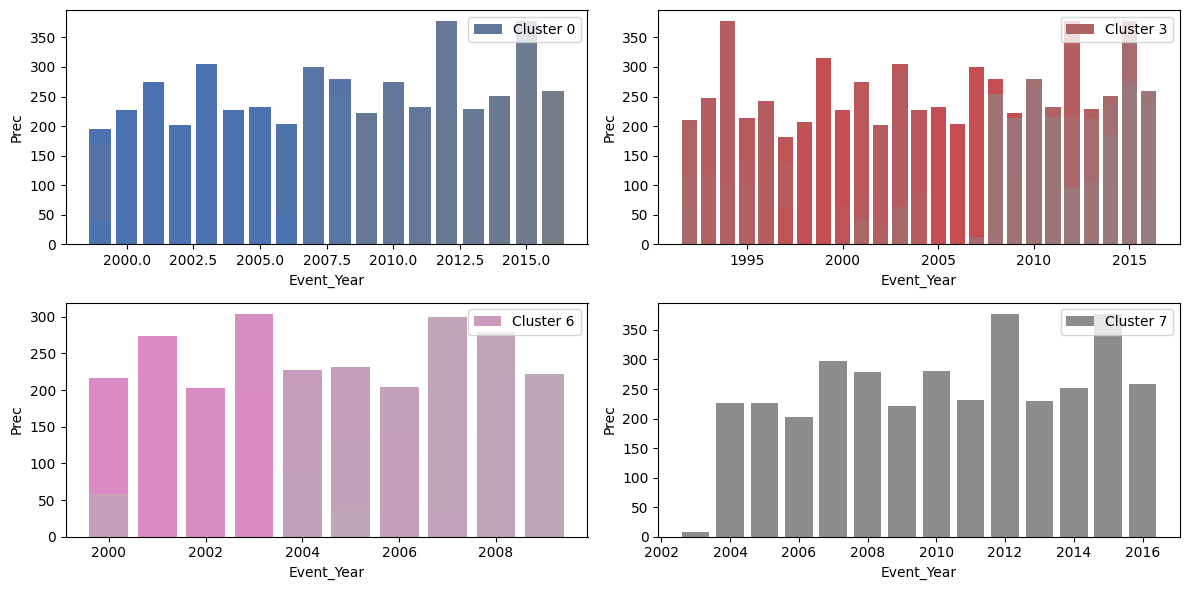

In [69]:
#Plot Each cluster with kernerl density distribution
#Filter desired clusters
filtered_df = df[(df['cluster'].isin(desired_clusters)) & (df['EventCode'] == "OMG")]# & (df['Event_Year'] == 2006) ] 
#desired_clusters = [0,1,2,3,4,5,6,7]
x_column = 17
print(df.columns[x_column])
y_column = 14
print(df.columns[y_column])

#Create the scatter plot with color based on member color
n_clusters = len(desired_clusters)
n_cols = int(len(desired_clusters)/2) #int(n_clusters / 4) + (n_clusters % 4)
n_rows = (n_clusters + n_cols - 1) // n_cols 

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12,6))
plt.subplots_adjust(hspace=0.8)



#Plot each
cluster_index = 0
for i in range(n_rows):
    for j in range(n_cols):
        if cluster_index >= n_clusters:
            break #No more clusters
        cluster = desired_clusters[cluster_index]
        cluster_df =filtered_df[filtered_df['cluster'] == cluster]
        
        axes[i, j].bar(cluster_df.iloc[:,x_column], cluster_df.iloc[:, y_column], color=cluster_df.iloc[:, 42], label=f'Cluster {cluster}') #,c=cluster_df.iloc[:, 42],)
        axes[i, j].set_ylabel("{}".format(df.columns[y_column]))
        axes[i, j].set_xlabel("{}".format(df.columns[x_column]))

        handles, labels = axes[i, j].get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        #labels.sort(key=lambda x: int(x.split()[1]))
        axes[i, j].legend([by_label[label] for label in labels], labels, loc='upper right') #, title='Cluster Labels')
        cluster_index += 1
#Add general title
#fig.suptitle("Bar of {} vs {}".format(filtered_df.columns[x_column], filtered_df.columns[y_column]), fontsize=16)
#fig.suptitle("Bar of Event_Month vs Precipitation", fontsize=16)
file_name = "in_event_month_vs_precipitation.png"
plt.savefig(file_name, format="png", dpi=500)
plt.tight_layout()
plt.show()

In [ ]:
#Plot Each cluster with kernerl density distribution
#Filter desired clusters
desired_clusters = [0,1,2,3,4,5,6,7]
filtered_df = df[(df['cluster'].isin(desired_clusters)) & (df['Event_Year'] == 2006) & (df['EventCode'] == 0)] 
x_column = 18
y_column = 12

#Create the scatter plot with color based on member color
n_clusters = len(desired_clusters)
cluster_number = 4
n_rows = int(n_clusters / cluster_number) + (n_clusters % cluster_number)
print(nrows)
fig, axes = plt.subplots(nrows=n_rows, ncols=cluster_number, figsize=(12,6))
#plt.subplots_adjust(hspace=0.8)

#AGe
threshold_age = 40

#Plot each
cluster_index = 0
for i in range(n_rows):
    for j in range(4):
        if cluster_index >= n_clusters:
            break #No more clusters
        cluster = desired_clusters[cluster_index]
        cluster_df =filtered_df[filtered_df['cluster'] == cluster]

        # x = cluster_df.iloc[:, x_column]
        # kde_xs = np.linspace(x.min(), x.max(), 200) #Adjust the number of points for smooth curves
        # kde_ys = gaussian_kde(x)(kde_xs)
        
           #Plot
        # member_colors = cluster_df['member_color'].to_numpy()
        # axes[i, j].plot(kde_xs, kde_ys, label=f'Cluster {cluster}', color=member_colors[0])
        
        axes[i, j].bar(cluster_df.iloc[:,x_column], cluster_df.iloc[:, y_column], color=cluster_df.iloc[:, 42], label=f'Cluster {cluster}') #,c=cluster_df.iloc[:, 42],)
        axes[i, j].set_ylabel("{}".format(df.columns[y_column]))
        axes[i, j].set_xlabel("{}".format(df.columns[x_column]))

        handles, labels = axes[i, j].get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        #labels.sort(key=lambda x: int(x.split()[1]))
        axes[i, j].legend([by_label[label] for label in labels], labels, loc='upper right') #, title='Cluster Labels')
        cluster_index += 1
#Add general title
fig.suptitle("Bar of {} vs {}".format(filtered_df.columns[x_column], filtered_df.columns[y_column]), fontsize=16)
plt.tight_layout()
plt.show()

## Plot The Occupations for each year based on clusters

In [178]:
# Group data by Occupation, Event_Year, and cluster_label, count occurrences
desired_clusters = [0,1,2,3,4,5,6,7,8]
select_year_df = df[(df['cluster'].isin(desired_clusters)) ]
#df_filtered = select_year_df[select_year_df['Event_Year'] == 2016]
occup_cluster_counts = select_year_df.groupby(['occup1', 'Event_Year', 'cluster']).size().unstack(fill_value=0)
occup_cluster_counts

cluster                 0  1  2    3  4  5  6    7  8
occup1     Event_Year                                
Agricultor 1992         0  0  0  257  0  0  0    0  0
           1993         0  0  0  421  0  0  0    0  0
           1994         0  0  0  495  0  0  0    0  0
           1995         0  0  0  516  0  0  0    0  0
           1996         0  0  0  534  0  0  0    0  0
...                    .. .. ..  ... .. .. ..  ... ..
Trader     2012        13  0  2    8  0  5  0   88  0
           2013         7  0  4    7  0  0  0  102  0
           2014         3  0  2    4  0  0  0   79  0
           2015         4  0  0    5  0  0  0   57  0
           2016         0  0  0    2  0  0  0   23  0

[250 rows x 9 columns]

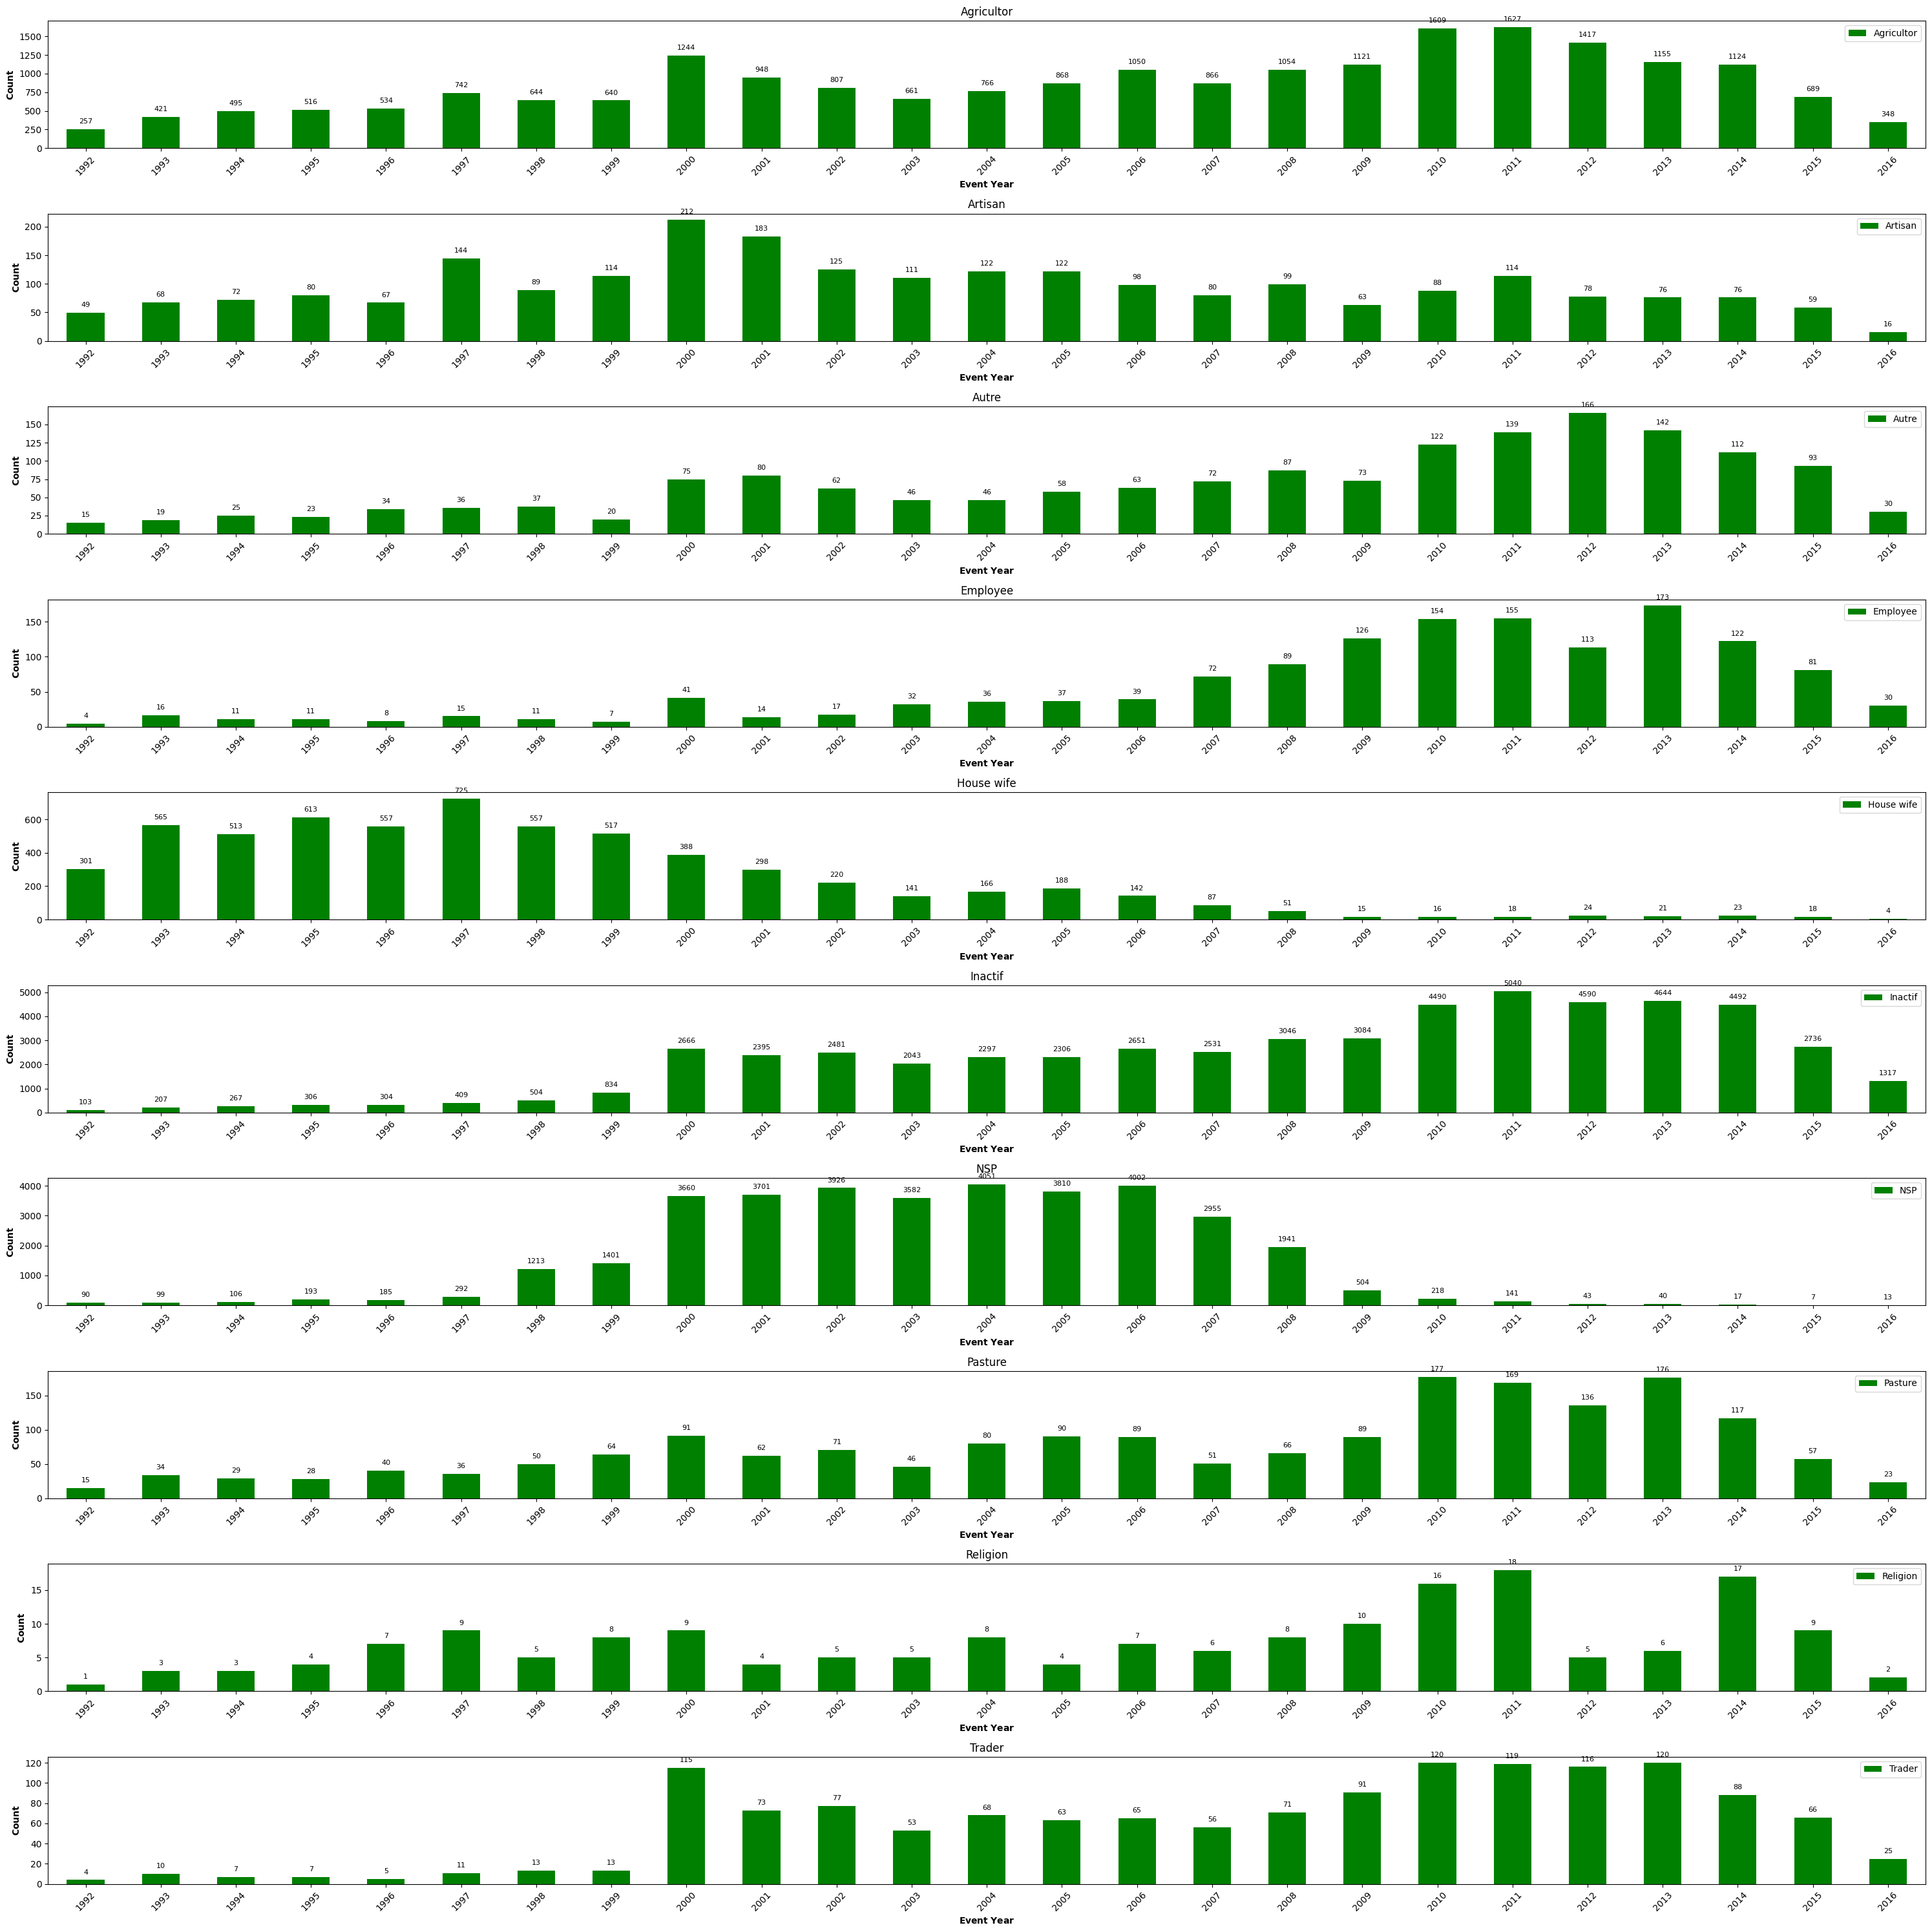

In [179]:
# Group data by Occupation and Event_Year, count occurrences
occupation_counts = select_year_df.groupby(['occup1', 'Event_Year']).size().unstack()

# Create a figure with subplots for each occupation (adjust figure size as needed)
fig, axes = plt.subplots(nrows=occupation_counts.shape[0], figsize=(30, 30))
plt.subplots_adjust(hspace=4.2)


# Iterate through each occupation and plot its data
for i, occupation in enumerate(occupation_counts.index):
    bars = occupation_counts.loc[occupation].plot(kind='bar', ax=axes[i], color='green')

    # Add count labels above each bar with some offset
    for rect in bars.patches:
        axes[i].annotate(str(rect.get_height()), (rect.get_x() + rect.get_width() / 2, rect.get_height()),
                         ha='center', va='bottom', fontsize=8, xytext=(0, 5), textcoords='offset points')

    axes[i].set_title(occupation)
    axes[i].set_xlabel(r'$\bf{Event\ Year}$')
    axes[i].set_ylabel(r'$\bf{Count}$')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    axes[i].legend(loc='upper right')  # Add legend

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig('images/occupation_bar_graphs.png', dpi=500)
plt.show()

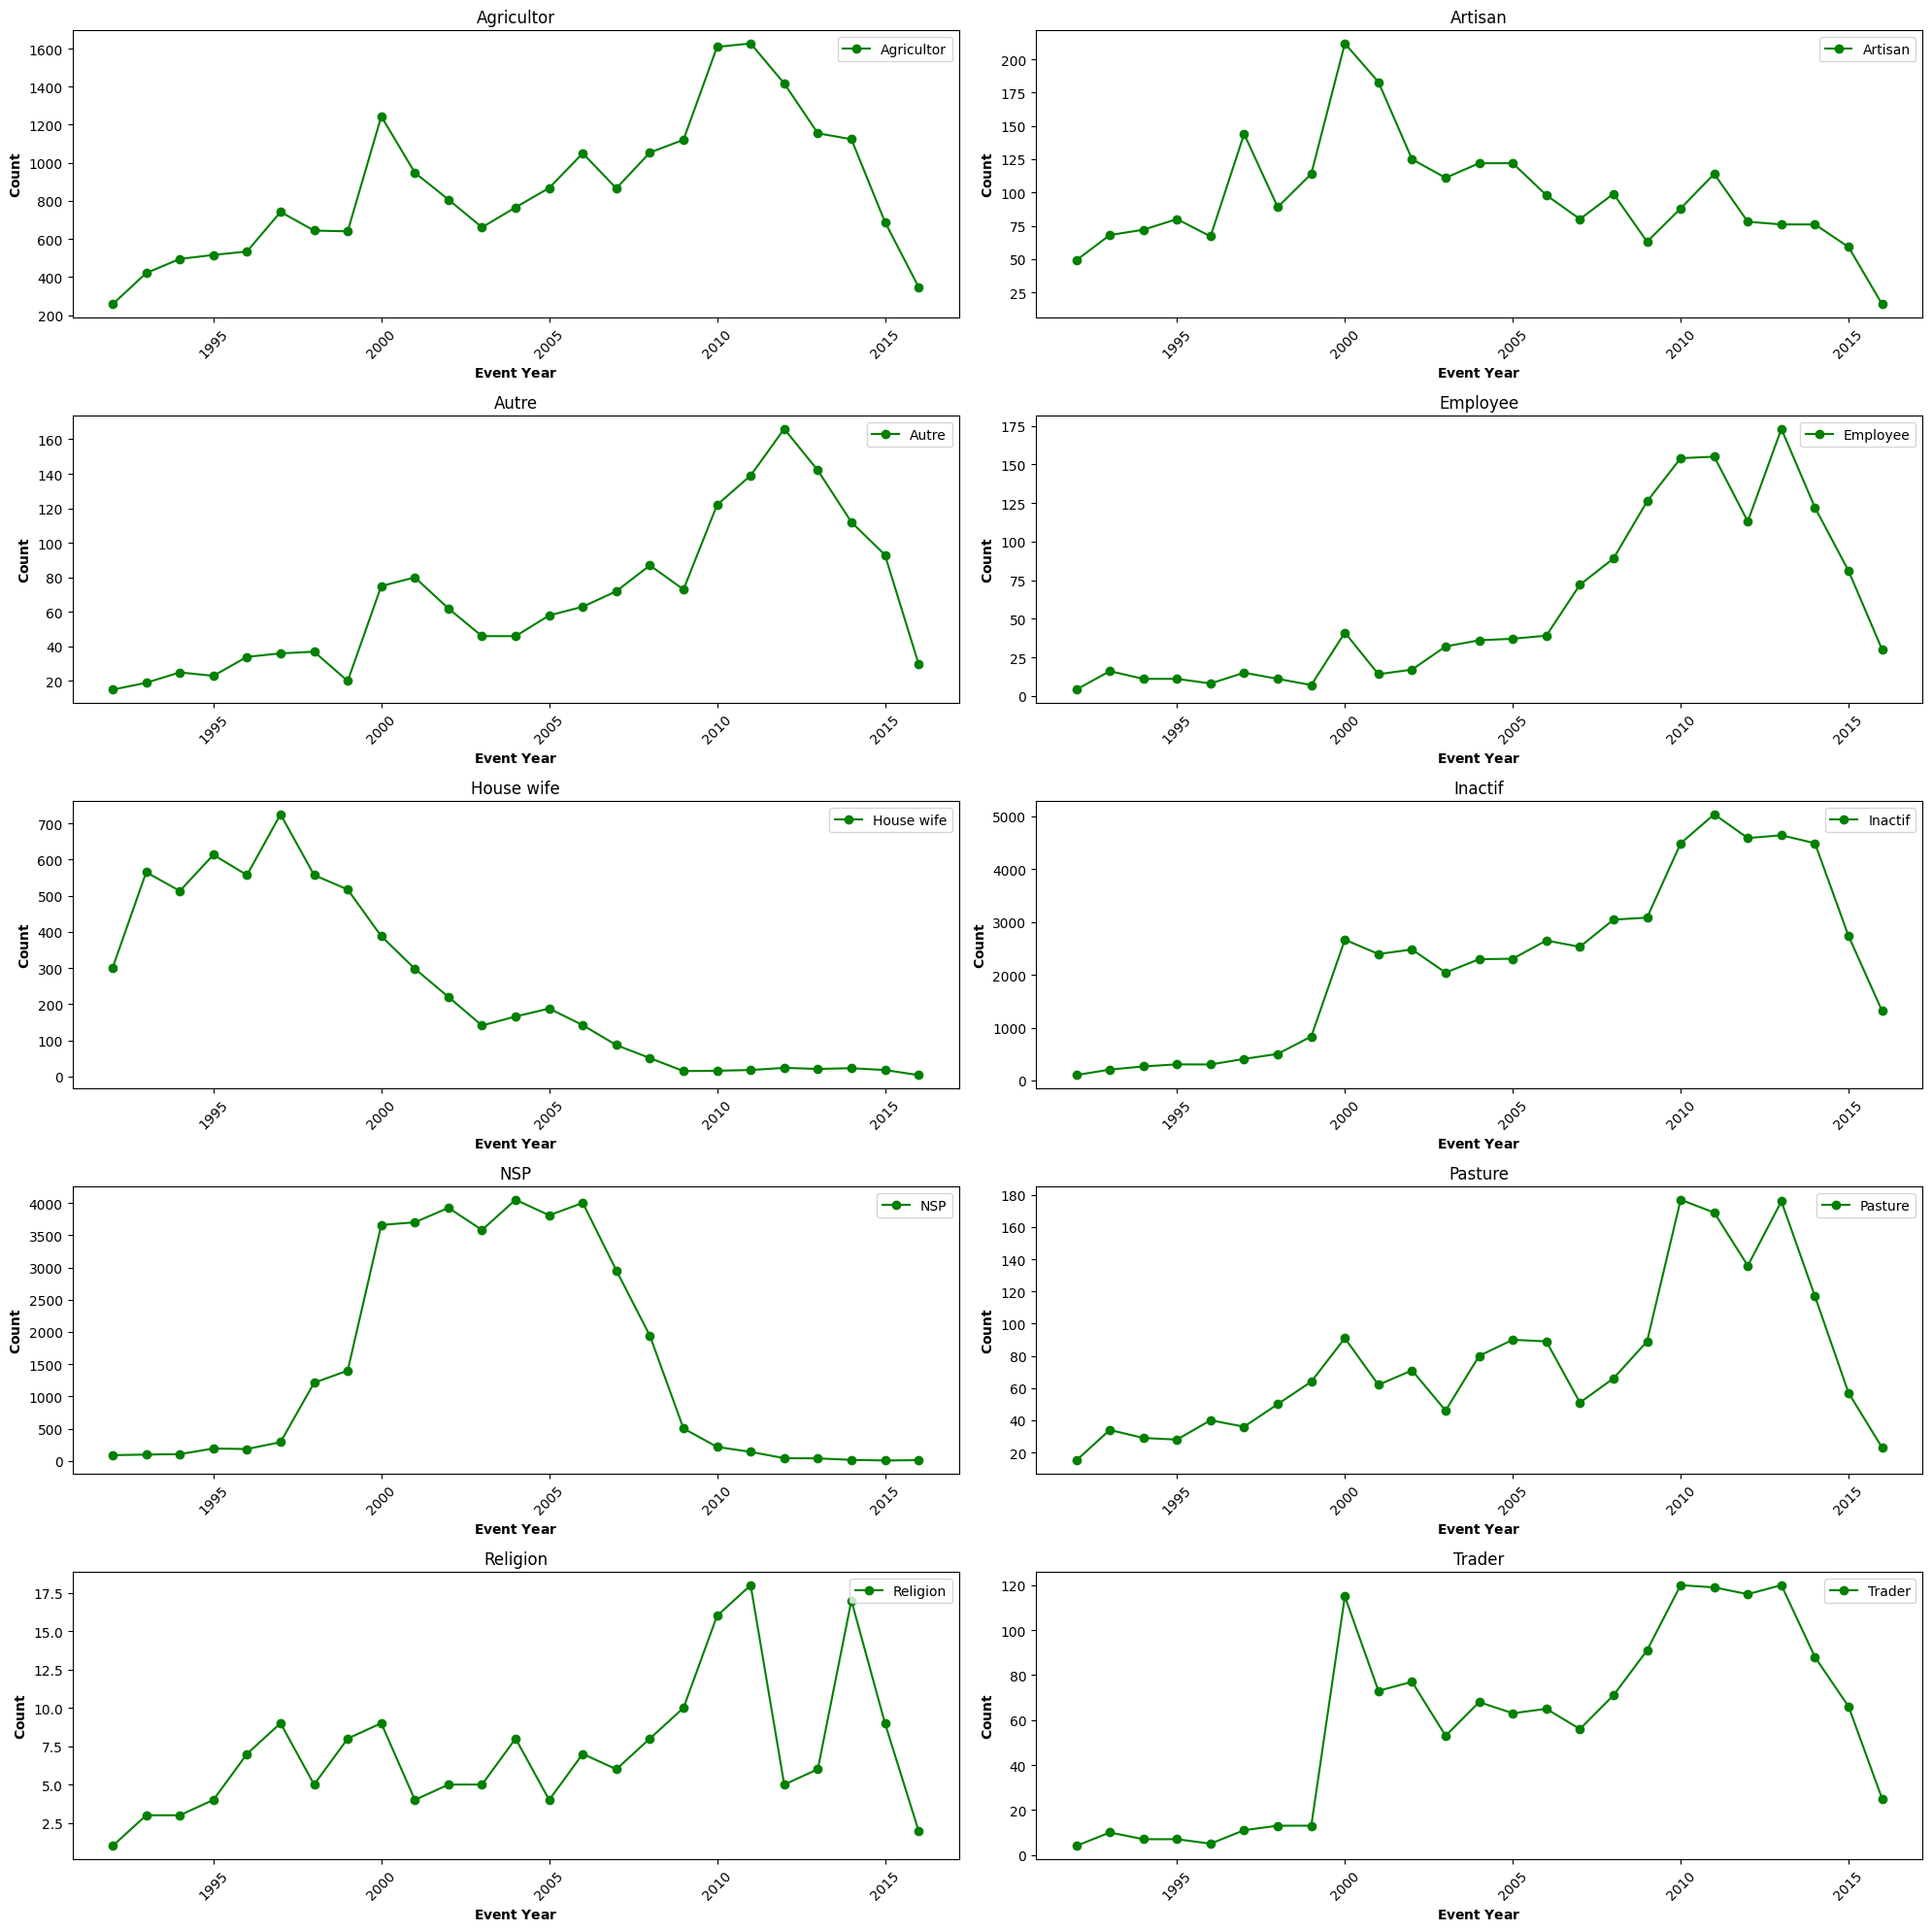

In [181]:
# Group data by Occupation and Event_Year, count occurrences
occupation_counts = select_year_df.groupby(['occup1', 'Event_Year']).size().unstack()

# Calculate number of rows and columns needed for subplots
n_occupations = occupation_counts.shape[0]
n_cols = 2
n_rows = (n_occupations + n_cols - 1) // n_cols

# Create a figure with subplots for each occupation (adjust figure size as needed)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 4 * n_rows))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate through each occupation and plot its data
for i, occupation in enumerate(occupation_counts.index):
    row = i // n_cols
    col = i % n_cols

    lines = occupation_counts.loc[occupation].plot(kind='line', ax=axes[i], color='green', marker='o')

    # Add count labels above each point with some offset
    for x, y in zip(range(len(occupation_counts.columns)), occupation_counts.loc[occupation].values):
        axes[i].annotate(str(y), (x, y), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

    axes[i].set_title(occupation)
    axes[i].set_xlabel(r'$\bf{Event\ Year}$')
    axes[i].set_ylabel(r'$\bf{Count}$')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    axes[i].legend(loc='upper right')  # Add legend

# Remove any extra empty subplots
for i in range(n_occupations, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and display the plot
plt.tight_layout()
#plt.savefig('images/occupation_line_graphs_two_columns.png', dpi=500)
plt.show()


<Figure size 1800x1600 with 0 Axes>

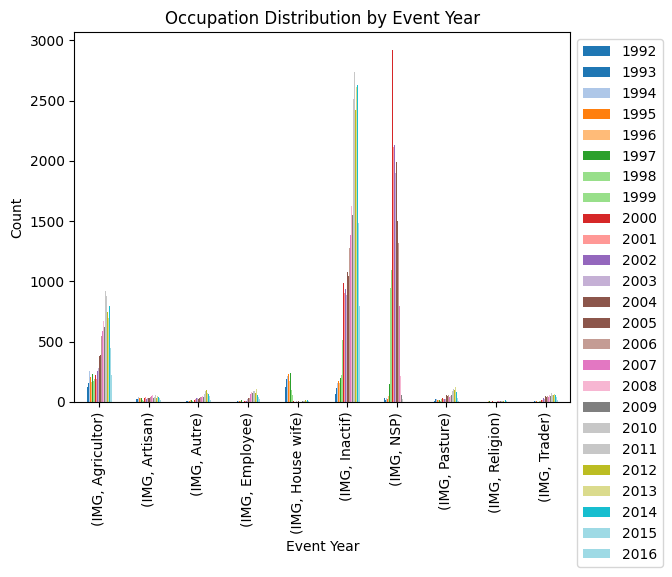

In [182]:
## Overall Occupation of mobile people
overall_occ_df = df[(df['cluster'].isin(desired_clusters)) & (df['EventCode'] == "IMG")]
desired_clusters = [0,3,6,7]

# Group data by Occupation and Event_Year, count occurrences
overall_occupation_counts = overall_occ_df.groupby(['EventCode','occup1', 'Event_Year']).size().unstack()

# Create bar plot
fig = plt.figure(figsize=(18,16))

overall_occupation_counts.plot(kind='bar', colormap='tab20')
plt.xlabel('Event Year')
plt.ylabel('Count')
plt.title('Occupation Distribution by Event Year')
plt.legend(loc="upper right", bbox_to_anchor=(1.2,1))
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
#plt.tight_layout()
plt.show()

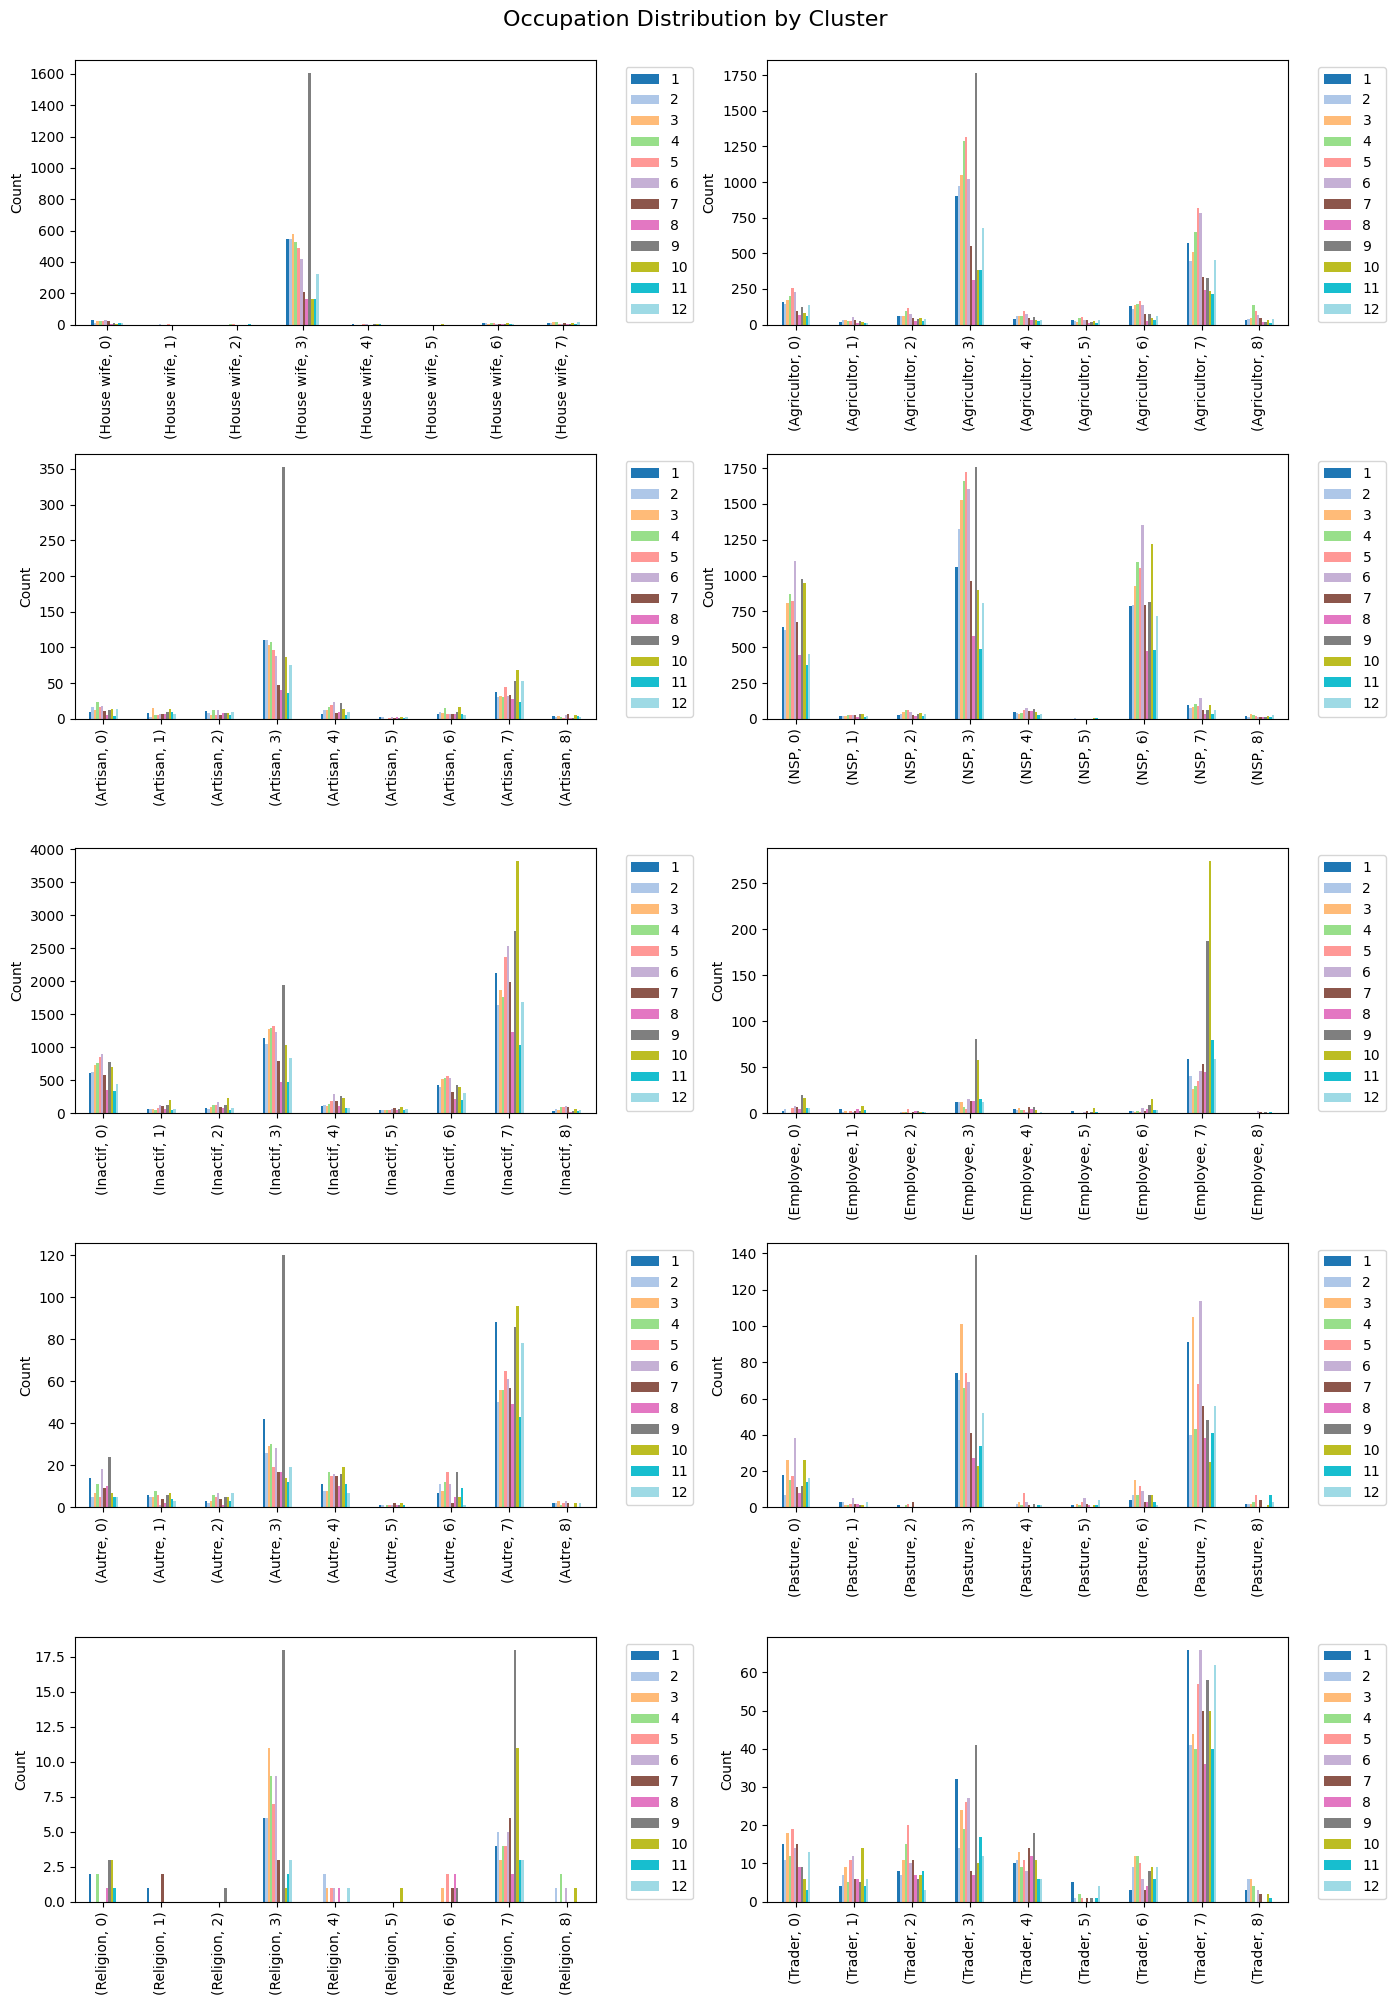

In [261]:
# Group data by Occupation, Event_Year, and cluster_label, count occurrences
desired_clusters = [0,1,2,3,4,5,6,7,8]
create_occp_list = df.occup1.unique()
occp_list = list(create_occp_list) 

# Calculate the number of rows needed based on the number of unique occupations
num_rows = math.ceil(len(occp_list) / 2)

# Create subplots with 2 columns
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14, 4*num_rows))
plt.subplots_adjust(top=0.9)
plt.subplots_adjust(hspace=0.8)


for i, occupation in enumerate(occp_list):
    row = i // 2  # Calculate the row index
    col = i % 2   # Calculate the column index
    
    all_select_year__occup_df = df[(df['cluster'].isin(desired_clusters)) &  (df['occup1'] == occupation)]# & (df['Event_Year'] == 2010)]
    #df_filtered = select_year_df[select_year_df['Event_Year'] == 2016]
    all_occup_EventYear_counts = all_select_year__occup_df.groupby(['occup1', 'cluster', 'Event_Month']).size().unstack(fill_value=0)

    all_occup_EventYear_counts.plot(kind='bar', colormap='tab20', ax=axes[row, col])
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('Count')
    
    axes[row, col].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability
    axes[row, col].legend(loc='upper right', bbox_to_anchor=(1.2,1))
#axes[row, col].set_title('Farmer Distribution by Event Month')
fig.suptitle('Occupation Distribution by Cluster', fontsize=16, y=1)

plt.tight_layout()
plt.savefig('images/cluster_occupation.png', dpi=300)
plt.show()
#all_occup_EventYear_counts.iloc[0]

## Check motive

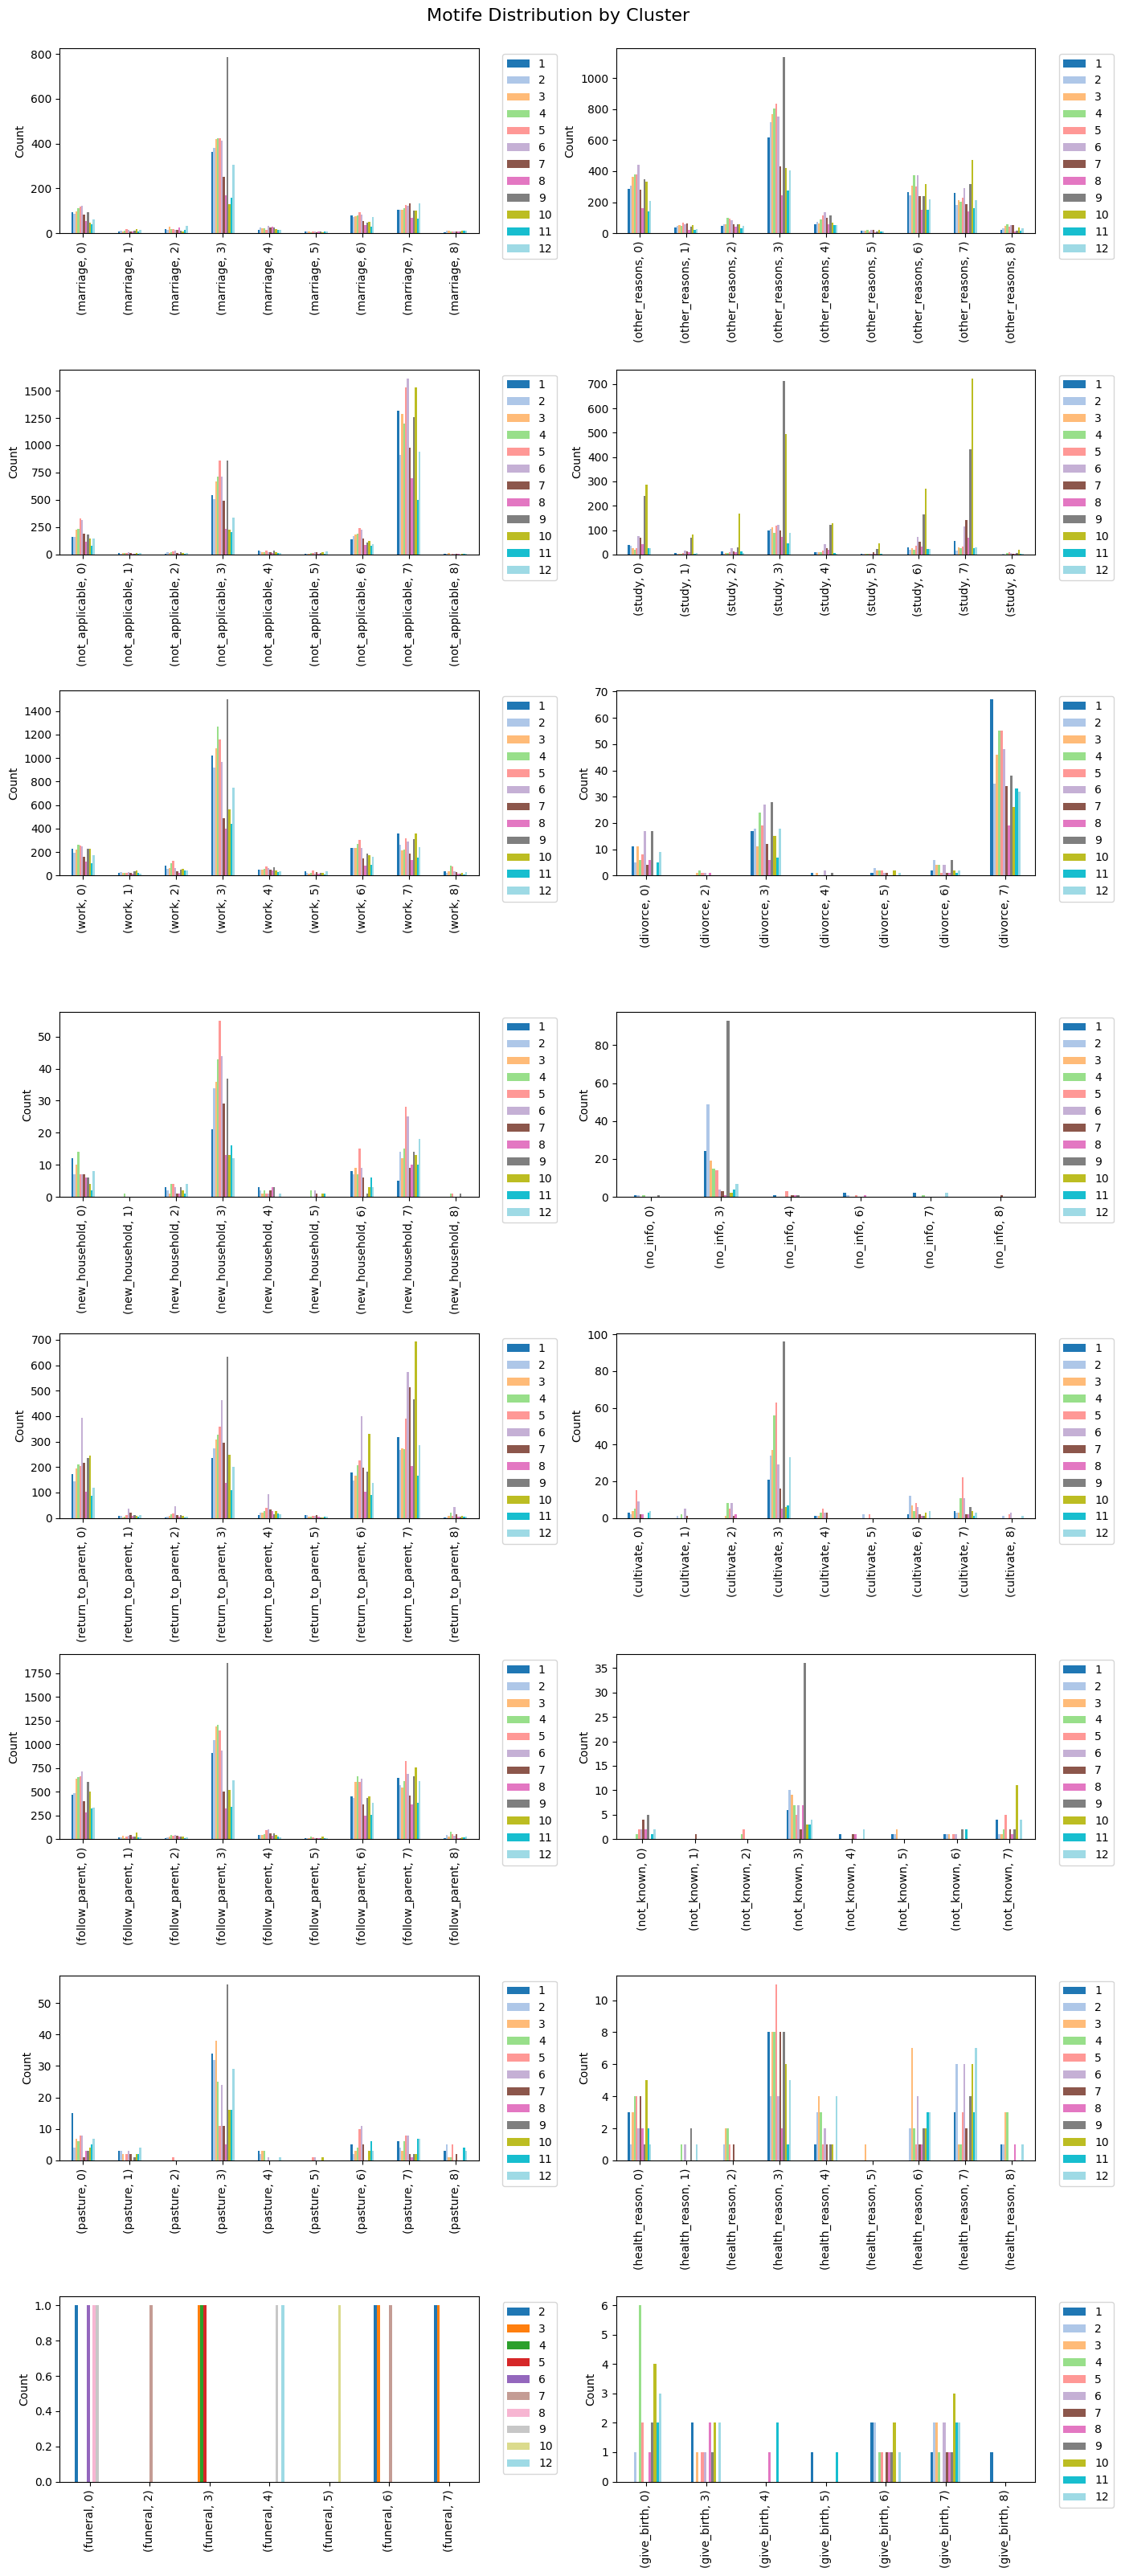

In [268]:
# Group data by Occupation, Event_Year, and cluster_label, count occurrences
desired_clusters = [0,1,2,3,4,5,6,7,8]
create_motif_list = df.codmotife.unique()
motif_list = list(create_motif_list) 

# Calculate the number of rows needed based on the number of unique occupations
num_rows = math.ceil(len(motif_list) / 2)

# Create subplots with 2 columns
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14, 4*num_rows))
plt.subplots_adjust(top=0.9)
plt.subplots_adjust(hspace=0.8)


for i, motif in enumerate(motif_list):
    row = i // 2  # Calculate the row index
    col = i % 2   # Calculate the column index
    
    all_select_year__motif_df = df[(df['cluster'].isin(desired_clusters)) &  (df['codmotife'] == motif)]# & (df['Event_Year'] == 2010)]
    #df_filtered = select_year_df[select_year_df['Event_Year'] == 2016]
    all_motif_EventYear_counts = all_select_year__motif_df.groupby(['codmotife', 'cluster', 'Event_Month']).size().unstack(fill_value=0)

    all_motif_EventYear_counts.plot(kind='bar', colormap='tab20', ax=axes[row, col])
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('Count')
    
    axes[row, col].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability
    axes[row, col].legend(loc='upper right', bbox_to_anchor=(1.2,1))
#axes[row, col].set_title('Farmer Distribution by Event Month')
fig.suptitle('Motife Distribution by Cluster', fontsize=16, y=1)

plt.tight_layout()
#plt.savefig('images/cluster_occupation.png', dpi=300)
plt.show()
#all_occup_EventYear_counts.iloc[0]

In [217]:
# Group data by Occupation, Event_Year, and cluster_label, count occurrences
desired_clusters = [0,1,2,3,4,5,6,7,8]
select_year__occup_df = df[(df['cluster'].isin(desired_clusters)) & (df['occup1'] == "House wife")]# & (df['Event_Year'] == 2010)]
#df_filtered = select_year_df[select_year_df['Event_Year'] == 2016]
occup_EventYear_counts = select_year__occup_df.groupby(['occup1', 'cluster', 'Event_Month']).size().unstack(fill_value=0)
occup_EventYear_counts

Event_Month          1    2    3    4    5    6    7    8     9    10   11  \
occup1     cluster                                                           
House wife 0         27    8   26   23   26   31   21    7    10    7   10   
           1          0    1    0    0    1    0    0    0     0    0    0   
           2          0    0    0    1    1    0    0    0     0    0    2   
           3        548  545  578  529  492  418  208  161  1608  163  161   
           4          1    0    0    0    1    2    0    0     2    1    1   
           5          0    0    0    0    0    0    0    0     0    1    0   
           6          9   12    7    8   12    7    6    6     5   13    2   
           7         10   13   17   16    5    6    8    4     5   12    5   

Event_Month          12  
occup1     cluster       
House wife 0         11  
           1          0  
           2          0  
           3        326  
           4          0  
           5          0  
           6          4  
           7         17

In [ ]:
# Create bar plot
fig = plt.figure(figsize=(18,16))

occup_EventYear_counts.plot(kind='bar', colormap='tab20')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Farmer Distribution by Event Month')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(loc='upper right') 
plt.legend(loc='upper right', bbox_to_anchor=(1.2,1))
plt.tight_layout()
plt.savefig('images/Agriculture_in_each_cluster', dpi=500)
plt.show()

<Figure size 1800x1600 with 0 Axes>

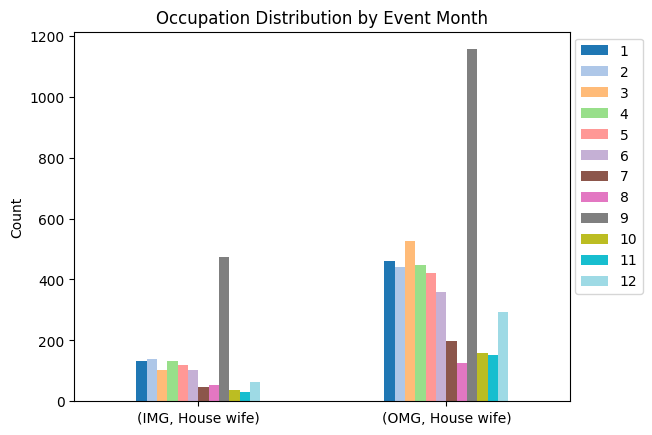

In [311]:
#filtered_df.head()
# Group data by Occupation and Event_Year, count occurrences
occupation_counts = select_year__occup_df.groupby(['EventCode','occup1', 'Event_Month']).size().unstack()

# Create bar plot
fig = plt.figure(figsize=(18,16))

occupation_counts.plot(kind='bar', colormap='tab20')
plt.xlabel('')
plt.ylabel('Count')
plt.title('Occupation Distribution by Event Month')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(bbox_to_anchor=(1.16, 1), loc='upper right') 
#plt.tight_layout()
plt.show()

## Farmers (Graph))

<Figure size 1800x1600 with 0 Axes>

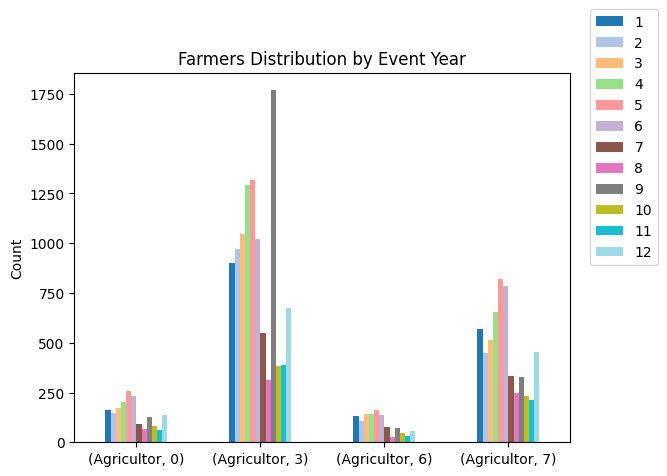

In [317]:
#filtered_df.head()

# Group data by Occupation, Event_Year, and cluster_label, count occurrences
y_desired_clusters = [0,1,2,3,4,5,6,7]
m_desired_clusters = [0,3,6,7]

event_code
select_year_farmers_df = df[(df['cluster'].isin(m_desired_clusters)) & (df['occup1'] == "Agricultor")] # & (df['EventCode'] == "OMG")]
#df_filtered = select_year_df[select_year_df['Event_Year'] == 2016]
occup_EventYear_fm_counts = select_year_farmers_df.groupby(['occup1', 'cluster', 'Event_Month']).size().unstack(fill_value=0)
#occup_EventYear_counts

# Group data by Occupation and Event_Year, count occurrences
occup_EventYear_fy_counts = select_year_farmers_df.groupby(['EventCode','occup1', 'Event_Year']).size().unstack(fill_value=0)

# Create bar plot
fig = plt.figure(figsize=(18,16))

occup_EventYear_fm_counts.plot(kind='bar', colormap='tab20')
plt.xlabel('', rotation=45, ha='center')
plt.ylabel('Count')
plt.title('Farmers Distribution by Event Year')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(bbox_to_anchor=(1.19, 1.19), loc='upper right') 
#plt.tight_layout()
plt.show()

In [ ]:
# Create bar plot
fig = plt.figure(figsize=(30,30))

destin_cluster_counts.plot(kind='bar', colormap='tab20')
plt.xlabel('Event Year')
#plt.ylabel('Count')
plt.title('Occupation Distribution by Event Year')
plt.legend(loc="upper right", bbox_to_anchor=(1.2,1))
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
#plt.tight_layout()
plt.show()